## FINAL NOTEBOOK OF ANALYSIS - SUBMISSION

### CONTENTS
#### NOTEBOOK has 3 PHASES of DATA PREPARATION and 3 STAGES of TASKS:
 - **PHASES**
     - [Required packages](#Importing-packages-and-data)
     - [Data Summary](#DATA-SUMMARY)
     - [User Definded Functions](#User-Definded-Functions)
     - [Custom Preprocessing](#CUSTOM-PREPROCESSING)
 - **STAGES**
     - [STAGE 1](#STAGE-1)
         - [Growth Rate %](#S1-TASK1)
         - [Tagging Investment Name with 1's and 0's](#S1-TASK2)
     - [STAGE 2](#STAGE-2)
         - [Univariate Distribution Graphs](#S2-TASK1)
         - [Mutual Info Score](#S2-TASK2)
     - [STAGE 3](#STAGE-3)
         - [train test split 7:3](#S3-TASK1)
         - [XGB Model](#S3-TASK2)

### Importing packages and data

In [1]:
import pandas as pd                    # dataframes
import numpy as np                     # any np operations
import matplotlib.pyplot as plt        # for plots
import seaborn as sns                  # plots
import warnings                        # supress deprecation or warning messages
%matplotlib inline                     
%load_ext autoreload
%autoreload 2
warnings.simplefilter("ignore")

In [2]:
dataset = pd.read_excel('./Dataset/2010 Federal STEM Education Inventory Data Set.xls', skiprows=1)
dataset.columns

Index(['Index Number', 'Investment Name', 'Agency', 'Subagency',
       'A) Brief Description', 'B) Year Established', 'C1) Funding FY2008',
       'C2) Funding FY2009', 'C3) Funding FY2010',
       'D) Mission-specific or General STEM?',
       ...
       'Unnamed: 246', 'Unnamed: 247',
       'Y3) Process or Implementation Evaluation Type', 'Unnamed: 249',
       'Unnamed: 250', 'Y4) Portfolio Evaluation/Review Type', 'Unnamed: 252',
       'Unnamed: 253', 'Y5) Expert Review Type', 'Unnamed: 255'],
      dtype='object', length=256)

### DATA SUMMARY

In [3]:
dataset.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [4]:
## statistics of dataset [non-object dtype]
dataset.describe()

,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,P) External Funding Allocation,R1) Joint Funding of Investment (with Agencies),Unnamed: 163,Unnamed: 166,Unnamed: 169,Unnamed: 172,Unnamed: 178,Unnamed: 181,Unnamed: 184
count,241.000000,231.000000,244.000000,253.000000,0.0,0.0,12.000000,4.000000,1.0000,1.000,2.000000,1.00,1.000
mean,1998.464730,24.215027,27.495004,27.077364,NaN,NaN,1.650048,1.048625,0.0445,0.089,0.887000,1.82,2.204
std,11.653317,185.603047,216.895416,217.438894,NaN,NaN,1.910847,1.392363,NaN,NaN,1.112986,NaN,NaN
min,1914.000000,0.000000,0.000000,0.000000,NaN,NaN,0.050000,0.044500,0.0445,0.089,0.100000,1.82,2.204
25%,1993.000000,0.688500,0.760072,0.857000,NaN,NaN,0.198375,0.048625,0.0445,0.089,0.493500,1.82,2.204
50%,2002.000000,2.047000,2.211000,2.461000,NaN,NaN,0.737625,0.575000,0.0445,0.089,0.887000,1.82,2.204
75%,2007.000000,8.400399,9.054625,9.327000,NaN,NaN,3.250457,1.575000,0.0445,0.089,1.280500,1.82,2.204
max,2010.000000,2796.835667,3354.390546,3425.286526,NaN,NaN,5.000000,3.000000,0.0445,0.089,1.674000,1.82,2.204


In [5]:
dataset.describe(include='O')

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,F2) Secondary Investment Objectives,Unnamed: 13,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
count,252,252,252,237,252,252,110,252,137,123,...,28,80,40,38,77,32,33,86,47,8
unique,252,251,13,64,252,2,2,7,1,1,...,1,1,1,1,1,1,1,1,1,1
top,PRG_0166,Global Learning and Observations to Benefit th...,NASA,Directorate for Education and Human Resources ...,The National Defense Science and Engineering G...,General STEM,Mission-related,Post-Secondary STEM Degrees: Increase the numb...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",...,INTERNAL,NO,INDEPENDENT,INTERNAL,NO,INDEPENDENT,INTERNAL,NO,INDEPENDENT,INTERNAL
freq,1,2,62,23,1,139,104,71,137,123,...,28,80,40,38,77,32,33,86,47,8


In [6]:
dataset.drop(['Index Number'],axis=1, inplace=True)
df = dataset.copy()

### User Definded Functions

#### [GOTO TEST CASES](#[TEST-CASES])

In [7]:
###################################### all user defined functions #################################################

######### Function required imports ##########
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score
labelencoder_x = LabelEncoder()



########################################### PREPROCESSING FUNCTIONS ###############################################

def check_missing_col(df, obj=1):
    '''
        inputs => dataframe and optional parameter for object dtype
        method to check and find the columns with missing values
        returns a tuple(Column Name, missing Value Counts)
        if obj = 1 => we are checking for Object datatype columns
        else => only for int64 or float64
    '''
    if df is None:
        return None
    if obj:
        return [(x, df.shape[0]-df[x].count()) for x in df.columns if df[x].dtype=='O' and df[x].count()!=df.shape[0]]
    else:
        return [(x, df.shape[0]-df[x].count()) for x in df.columns if df[x].dtype!='O' and df[x].count()!=df.shape[0]]


def find_missing_row(col, df, obj=1):
    '''
        if col is passed, this method returns the missing value row
        like always obj=1 for object datatype
    '''
    if col is None or df is None:
        return None
    if obj:
        return [x for x in range(df.shape[0]) if type(df[col][x])!=str]
    else:
        return [x for x in range(df.shape[0]) if not x>=0]
    
    

### if there is any comman row among all, let's remove it
def common_row_missing(col, df, obj=1):
    '''
        calculates frequency of row numbers having missing values
    '''
    if col is None or df is None:
        return None
    scoring_rows = {}
    for x in col:
        for y in find_missing_row(x[0],df, obj):
            if y in scoring_rows:
                scoring_rows[y]+= 1
            else:
                scoring_rows[y] = 1
    return sorted(scoring_rows.items(), key=lambda kv: kv[1], reverse=True)[:10]




def fill_funding(col, df):
    '''
        #### intution ###
        filling missing funding values before tagging growth rate
    '''
    if col is None or df is None:
        return None
    
    funding_rec = pd.DataFrame(df.groupby('Agency')[col].mean())
    print(funding_rec.head())
    company_details =[(x,df['Agency'][x]) for x in range(df.shape[0]) if not df[col][x]>=0]
    ## print(comany_details)
    ## tuple index, agency
    for x in company_details:
        print(x[0], x[1])
        df[col][x[0]] = funding_rec[col][x[1]]



def loop_check(obj=1):
    '''
        preprocessing handy check to find missing cols
    '''
    dataset_missing_col = check_missing_col(dataset,obj)
    for x in dataset_missing_col:
        print(dataset[x[0]].head())



def fill_sub_agency(df):
    '''
        subagency values are missing filling it based on groupby agency most frequent Subagency
    '''
    ## let's fill it based on agency
    if df is None or 'Agency' not in df.columns or 'Subagency' not in df.columns:
        return None
    agency_rec = pd.DataFrame(df.groupby('Agency')['Subagency'].agg(lambda x:x.value_counts().index[0]))
    company_details =[(x,df['Agency'][x]) for x in range(df.shape[0]) if type(df['Subagency'][x])!=str]
    for x in company_details:
        df['Subagency'][x[0]] = agency_rec['Subagency'][x[1]]
    return agency_rec


def fill_single_val_col(col,df):
    '''
        fill single valued columns like single unique and nan
    '''
    if col is None or df is None:
        return None
    for x in col:
        df[col]= df[col].fillna("NOT")
        print('Handled missing values of -------------------- ',x)
        
        
def fill_missing_year(col,df):
    '''
        filling missing values of year
    '''
    if col is None or df is None or 'Agency' not in df.columns or 'Investment Name' not in df.columns:
        return None
    year_rec = pd.DataFrame(df.groupby('Agency')[col].mean())
    investment_names = [(x, df['Investment Name'][x], df['Agency'][x]) for x in range(df.shape[0]) if not df[col][x]>=0]
    for x in investment_names:
        # print(x[0],x[2])
        df[col][x[0]] = int(year_rec.ix[x[2]])


############################################# STAGE 1 FUNCTIONS ####################################################
        
## let's tag for each investment
def growth_rate(past, cur):
    '''
        ### STAGE 1 FUNCTION ###
        for tagging investment names based on growth rate percentage
    '''
    if past:
        # check for past is zero
        if cur:
            return 1 if round(((cur-past)*100/past),2) >0 else 0
        else:
            return 0
    elif cur == 0 or cur is None:
        return 0
    else:
        # logically previously no funding but now we have, so positive
        return 1
    
### checking if adding a feature growth percentage can impact 
def add_growth_per(df):
    '''
        ### STAGE 1 FUNCTION ###
        Also to add extra column as growth_percentage
    '''
    if 'C2) Funding FY2009' in df.columns and 'C1) Funding FY2008' in df.columns:
        df['growth_percentage'] = ((df['C2) Funding FY2009']-df['C1) Funding FY2008'])*100/df['C1) Funding FY2008'])
        return df
    else:
        return None


############################################# STAGE 2 FUNCTIONS ###################################################    
    
def just_label_encode(col):
    '''
        label encode data before plotting 
    '''
    if len(col)>0:
        return labelencoder_x.fit_transform(col)
    else:
        return None


def show_uni_plots(funding_var, gen_dataset):
    '''
        ### STAGE 2 FUNCTION ###
        function to plot the dataset of non-funding variables
    '''
    if funding_var is None or gen_dataset is None or len(funding_var)==0:
        return None
    for x in gen_dataset.columns:
        if x not in funding_var:
            plt.figure(x)
            gen_dataset[x] = gen_dataset[x].astype('str')
            sns.distplot(just_label_encode(gen_dataset[x]),axlabel = x, kde_kws={'color':'r'})


## target vs all non-funding var
def get_mutual_info_score(target,col):
    '''
        ### STAGE 2 FUNCTION ###
        function to calculate target vs specified column [non-funding in this context]
    '''
    
    if col is None or target is None or len(target)!=len(col):
        return None
    return mutual_info_score(target,col)


## CUSTOM PREPROCESSING

In [8]:
### this variable always changes and I have used many times, do not execute it in any random order
dataset_missing_col = check_missing_col(dataset)
dataset_missing_col

[('Investment Name', 1),
 ('Agency', 1),
 ('Subagency', 16),
 ('A) Brief Description', 1),
 ('D) Mission-specific or General STEM?', 1),
 ('E) Agency or Mission-Related Workforce Needs?', 143),
 ('F1) Primary Investment Objective', 1),
 ('F2) Secondary Investment Objectives', 116),
 ('Unnamed: 13', 130),
 ('Unnamed: 14', 172),
 ('Unnamed: 15', 166),
 ('Unnamed: 16', 152),
 ('Unnamed: 17', 165),
 ('Unnamed: 18', 227),
 ('Unnamed: 19', 213),
 ('Unnamed: 20', 217),
 ('Unnamed: 21', 217),
 ('G1) Primary Research Approaches', 239),
 ('Unnamed: 23', 235),
 ('Unnamed: 24', 205),
 ('Unnamed: 25', 210),
 ('Unnamed: 26', 205),
 ('G2) Secondary Research Approaches', 230),
 ('Unnamed: 28', 215),
 ('Unnamed: 29', 208),
 ('Unnamed: 30', 209),
 ('Unnamed: 31', 220),
 ('G3) Research Approaches Not Used', 163),
 ('Unnamed: 33', 181),
 ('Unnamed: 34', 213),
 ('Unnamed: 35', 209),
 ('Unnamed: 36', 202),
 ('H) Educational Services or Products Produced', 140),
 ('Unnamed: 38', 114),
 ('Unnamed: 39', 141),


In [9]:
common_row_missing(dataset_missing_col, dataset)

[(252, 242),
 (226, 224),
 (214, 224),
 (111, 223),
 (109, 222),
 (93, 222),
 (110, 221),
 (213, 221),
 (233, 221),
 (243, 221)]

In [10]:
## 252 row has many missing val, let's check
dataset.ix[252].head(10)

Investment Name                                      NaN
Agency                                               NaN
Subagency                                            NaN
A) Brief Description                                 NaN
B) Year Established                                  NaN
C1) Funding FY2008                               2796.84
C2) Funding FY2009                               3354.39
C3) Funding FY2010                               3425.29
D) Mission-specific or General STEM?                 NaN
E) Agency or Mission-Related Workforce Needs?        NaN
Name: 252, dtype: object

In [11]:
### I feel this row as useless for any data analysis
dataset.drop([252],inplace=True)
dataset.shape

(252, 255)

In [12]:
### encoding to fix string datatypes
loop_check()

0                    Directorate for Geosciences (GEO)
1    Directorate for Computer & Information Science...
2    Directorate for Computer & Information Science...
3                    Directorate for Geosciences (GEO)
4                    Directorate for Geosciences (GEO)
Name: Subagency, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: E) Agency or Mission-Related Workforce Needs?, dtype: object
0    Learning: Develop STEM skills, practices, or k...
1    Learning: Develop STEM skills, practices, or k...
2                                                  NaN
3    Learning: Develop STEM skills, practices, or k...
4                                                  NaN
Name: F2) Secondary Investment Objectives, dtype: object
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase lear

Name: Unnamed: 235, dtype: object
0    Other
1    Other
2      NaN
3    Other
4      NaN
Name: Unnamed: 236, dtype: object
0    Number of ocean science researchers with impro...
1                                Same answer as above.
2                                                  NaN
3    Attitudes toward STEM/geoscience and self-effi...
4                                                  NaN
Name: Unnamed: 237, dtype: object
0    Database of research proposals submitted to th...
1                                                  NaN
2                      evaluator-developed instruments
3                                    Varies by project
4              Annual project reports submitted to NSF
Name: W) Measurement Instruments Used, dtype: object
0     Annual/bi-annual evaluation suveys of scientists
1                                                  NaN
2                                                  NaN
3    contract with AIR to compile Supplemental Info...
4               tria

In [13]:
fill_sub_agency(dataset)

,Subagency
Agency,
Agriculture,NIFA
Commerce,NOAA
Defense,National Security Agency
Education,Office of Postsecondary Education (OPE)
Energy,"Office of Science, Office of Workforce Develop..."
Environmental Protection Agency,Office Research and Development (ORD)
Health & Human Services,National Institute of General Medical Sciences...
Homeland Security,S&T Office of University Programs
Interior,USGS


In [14]:
loop_check()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: E) Agency or Mission-Related Workforce Needs?, dtype: object
0    Learning: Develop STEM skills, practices, or k...
1    Learning: Develop STEM skills, practices, or k...
2                                                  NaN
3    Learning: Develop STEM skills, practices, or k...
4                                                  NaN
Name: F2) Secondary Investment Objectives, dtype: object
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase learners’ engagement, int...
Name: Unnamed: 13, dtype: object
0    Pre and In Service Educator/Education Leader P...
1    Pre and In Service Educator/Education Leader P...
2                                                  NaN
3    Pre and In Service Educator/Education Leader P...
4    Pre and In Service Educ

In [15]:
dataset['E) Agency or Mission-Related Workforce Needs?']=dataset['E) Agency or Mission-Related Workforce Needs?'].fillna('Not Filled')
loop_check()

0    Learning: Develop STEM skills, practices, or k...
1    Learning: Develop STEM skills, practices, or k...
2                                                  NaN
3    Learning: Develop STEM skills, practices, or k...
4                                                  NaN
Name: F2) Secondary Investment Objectives, dtype: object
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase learners’ engagement, int...
Name: Unnamed: 13, dtype: object
0    Pre and In Service Educator/Education Leader P...
1    Pre and In Service Educator/Education Leader P...
2                                                  NaN
3    Pre and In Service Educator/Education Leader P...
4    Pre and In Service Educator/Education Leader P...
Name: Unnamed: 14, dtype: object
0    Post-Secondary STEM Degrees: Increase the numb.

In [16]:
print(dataset['F2) Secondary Investment Objectives'].unique())
print("***********************************************************************")
dataset['F2) Secondary Investment Objectives'] = dataset['F2) Secondary Investment Objectives'].fillna('Not Learning')
loop_check()

[ 'Learning: Develop STEM skills, practices, or knowledge of students or the public'
 nan]
***********************************************************************
0    Engagement: Increase learners’ engagement, int...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Engagement: Increase learners’ engagement, int...
Name: Unnamed: 13, dtype: object
0    Pre and In Service Educator/Education Leader P...
1    Pre and In Service Educator/Education Leader P...
2                                                  NaN
3    Pre and In Service Educator/Education Leader P...
4    Pre and In Service Educator/Education Leader P...
Name: Unnamed: 14, dtype: object
0    Post-Secondary STEM Degrees: Increase the numb...
1    Post-Secondary STEM Degrees: Increase the numb...
2    Post-Secondary STEM Degrees: Increase the numb...
3    Post-Secondary STEM Degrees: Increase the numb...
4

In [17]:
dataset_missing_col = check_missing_col(dataset)
#### if columns with single value and nan 
single_val_col = []
other_val_col = []
for x in dataset_missing_col:
    if len(dataset[x[0]].unique()) == 2:
        single_val_col.append(x[0])
    else:
        other_val_col.append(x[0])

In [18]:
fill_single_val_col(single_val_col, dataset)

Handled missing values of --------------------  Unnamed: 13
Handled missing values of --------------------  Unnamed: 14
Handled missing values of --------------------  Unnamed: 15
Handled missing values of --------------------  Unnamed: 16
Handled missing values of --------------------  Unnamed: 17
Handled missing values of --------------------  Unnamed: 18
Handled missing values of --------------------  Unnamed: 19
Handled missing values of --------------------  Unnamed: 20
Handled missing values of --------------------  G1) Primary Research Approaches
Handled missing values of --------------------  Unnamed: 23
Handled missing values of --------------------  Unnamed: 24
Handled missing values of --------------------  Unnamed: 25
Handled missing values of --------------------  Unnamed: 26
Handled missing values of --------------------  G2) Secondary Research Approaches
Handled missing values of --------------------  Unnamed: 28
Handled missing values of --------------------  Unnamed: 2

Handled missing values of --------------------  Unnamed: 203
Handled missing values of --------------------  Unnamed: 204
Handled missing values of --------------------  Unnamed: 205
Handled missing values of --------------------  Unnamed: 206
Handled missing values of --------------------  Unnamed: 207
Handled missing values of --------------------  Unnamed: 208
Handled missing values of --------------------  Unnamed: 211
Handled missing values of --------------------  Unnamed: 212
Handled missing values of --------------------  Unnamed: 216
Handled missing values of --------------------  Unnamed: 217
Handled missing values of --------------------  Unnamed: 218
Handled missing values of --------------------  Unnamed: 220
Handled missing values of --------------------  Unnamed: 221
Handled missing values of --------------------  Unnamed: 223
Handled missing values of --------------------  Unnamed: 226
Handled missing values of --------------------  Unnamed: 227
Handled missing values o

In [19]:
loop_check()

0    Foster the integration of ocean research and e...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: Unnamed: 21, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 43, dtype: object
0    STEM learning program (i.e., after-school, wee...
1    STEM learning program (i.e., after-school, wee...
2                                                  NaN
3    STEM learning program (i.e., after-school, wee...
4    STEM learning program (i.e., after-school, wee...
Name: Unnamed: 45, dtype: object
0                          NaN
1                          NaN
2    Assessment implementation
3    Assessment implementation
4    Assessment implementation
Name: Unnamed: 50, dtype: object
0                       NaN
1                       NaN
2                       NaN
3                       NaN
4    A

In [20]:
for x in other_val_col:
    print('Handling missing values of  ---------------------- ',x)
    dataset[x] = dataset[x].fillna("Not Any of the mentioned")

Handling missing values of  ----------------------  Unnamed: 21
Handling missing values of  ----------------------  Unnamed: 43
Handling missing values of  ----------------------  Unnamed: 45
Handling missing values of  ----------------------  Unnamed: 50
Handling missing values of  ----------------------  Unnamed: 51
Handling missing values of  ----------------------  Unnamed: 52
Handling missing values of  ----------------------  Unnamed: 53
Handling missing values of  ----------------------  Unnamed: 55
Handling missing values of  ----------------------  I1) STEM Learners Targeted? Specify.
Handling missing values of  ----------------------  Unnamed: 59
Handling missing values of  ----------------------  Unnamed: 60
Handling missing values of  ----------------------  Unnamed: 61
Handling missing values of  ----------------------  Unnamed: 62
Handling missing values of  ----------------------  Unnamed: 63
Handling missing values of  ----------------------  I2) Pre-service-service STE

In [21]:
## missing values of non object datatype
dataset_missing_col = check_missing_col(dataset,obj=0)
dataset_missing_col[:-1]

[('B) Year Established', 11),
 ('C1) Funding FY2008', 22),
 ('C2) Funding FY2009', 9),
 ('P) External Funding Allocation', 252),
 ('R1) Joint Funding of Investment (with Agencies)', 252),
 ('Unnamed: 163', 240),
 ('Unnamed: 166', 248),
 ('Unnamed: 169', 251),
 ('Unnamed: 172', 251),
 ('Unnamed: 178', 250),
 ('Unnamed: 181', 251)]

In [22]:
fill_missing_year('B) Year Established', dataset)

In [23]:
## external funding and joint funding is completely null so dropping them
dataset.drop(['P) External Funding Allocation','R1) Joint Funding of Investment (with Agencies)'],axis=1, inplace=True)

In [24]:
### all the remaining missing cols are related to funding, it means either no joint funding or it is not filled 
## not gonna fill them with mean, median or mode coz it might impact on the predictions
for x in dataset_missing_col[5:-1]:
    dataset[x[0]] = dataset[x[0]].fillna(0)

In [25]:
dataset.head(1)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.7,General STEM,Not Filled,...,NOT,NOT,NOT,NOT,NO,INDEPENDENT,NOT,NOT,INDEPENDENT,NOT


## STAGE 1

In [26]:
### 1) calculating growth rate percentage
### 2) tagging 1 if it is positive else 0
### growth_rate = (current-past)/past

In [27]:
### what if we have missing values in funding years
check_missing_col(dataset, obj=0)[:8]

[('C1) Funding FY2008', 22), ('C2) Funding FY2009', 9), ('Unnamed: 184', 251)]

In [28]:
### filling missing values for each year
fill_funding('C1) Funding FY2008',dataset)
fill_funding('C2) Funding FY2009',dataset)

             C1) Funding FY2008
Agency                         
Agriculture            4.587267
Commerce               3.115588
Defense                6.778314
Education             47.431857
Energy                 1.215943
52 NASA
55 NASA
56 NASA
59 NASA
69 NASA
70 NASA
72 NASA
73 NASA
79 NASA
85 NASA
86 NASA
88 NASA
92 NASA
98 Defense
113 Environmental Protection Agency
121 Energy
122 Energy
128 Energy
147 Education
218 Agriculture
239 Defense
250 Agriculture
             C2) Funding FY2009
Agency                         
Agriculture            4.365933
Commerce               3.471767
Defense                8.483045
Education             58.277018
Energy                 1.717495
56 NASA
72 NASA
73 NASA
85 NASA
98 Defense
128 Energy
147 Education
218 Agriculture
250 Agriculture


#### S1 TASK1

In [29]:
## adding percentage growth rate
add_growth_per(dataset)
dataset.shape

(252, 254)

#### S1 TASK2

In [30]:
## time to tag Investment name
dataset['target'] = dataset.apply(lambda x: growth_rate(x['C1) Funding FY2008'],x['C2) Funding FY2009']), axis=1)
dataset.target.head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [31]:
## small check
dataset.target.count()

252

In [32]:
dataset.shape

(252, 255)

In [33]:
##### Before moving to next stage, displaying dataset of sample size 10*257
dataset.head(10)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255,growth_percentage,target
0,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,Not Filled,...,NOT,NOT,NO,INDEPENDENT,NOT,NOT,INDEPENDENT,NOT,37.213740,1
1,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,Not Filled,...,NOT,NOT,NO,NOT,NOT,NO,NOT,NOT,0.000000,0
2,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,Not Filled,...,NOT,NOT,NO,NOT,NOT,NO,NOT,NOT,0.000000,0
3,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,Not Filled,...,INDEPENDENT,NOT,NOT,INDEPENDENT,NOT,NOT,INDEPENDENT,NOT,157.986871,1
4,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,Not Filled,...,NOT,NOT,NO,NOT,NOT,NO,NOT,NOT,68.098160,1
5,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Teacher Training (GEO-Teach) pr...,2006.0,3.00,3.00,2.98,General STEM,Not Filled,...,NOT,NOT,NO,NOT,NOT,NO,NOT,NOT,0.000000,0
6,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),The GLOBE Program is a hands-on international ...,1995.0,1.10,1.12,1.10,General STEM,Not Filled,...,NOT,NOT,NO,NOT,NOT,NO,NOT,NOT,1.818182,1
7,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,The purpose of the NSF Graduate Research Fello...,1952.0,96.02,162.43,136.13,General STEM,Not Filled,...,NOT,NOT,NO,NOT,NOT,NO,INDEPENDENT,NOT,69.162674,1
8,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,IGERT is an NSF-wide program intended to meet ...,1997.0,64.76,77.99,69.70,General STEM,Not Filled,...,NOT,NOT,NO,NOT,NOT,NO,INDEPENDENT,NOT,20.429277,1
9,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,The objectives of the GK-12 program are: 1) to...,1999.0,54.60,58.84,55.97,General STEM,Not Filled,...,NOT,NOT,NO,INDEPENDENT,NOT,NOT,INDEPENDENT,NOT,7.765568,1


## STAGE 2

In [34]:
### 1) GRAPHS [univariate distribution] of all non-funding variables
### 2) Calculate mututal_info_score for target vs all non-funding variables
### for plotting -> sns.distplot(df[col], axlabel="name of plot", kde_kws={}, hist_kws={})

#### S2 TASK1

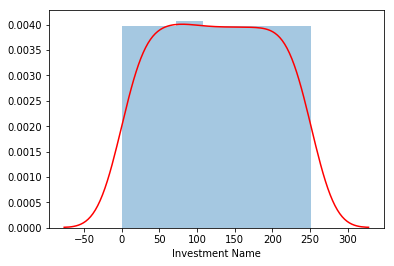

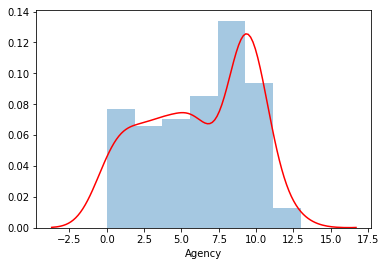

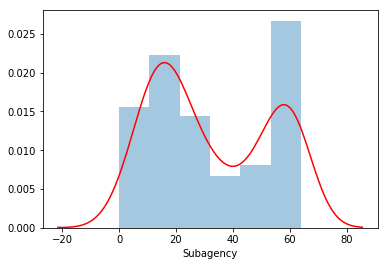

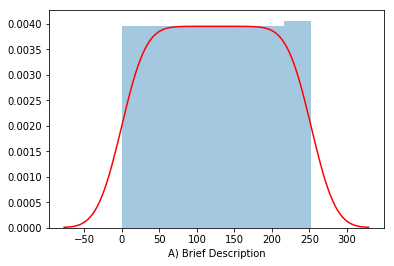

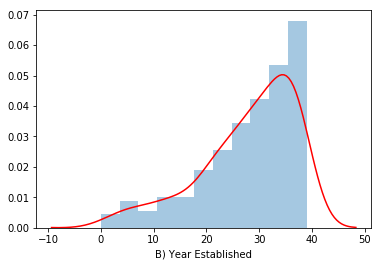

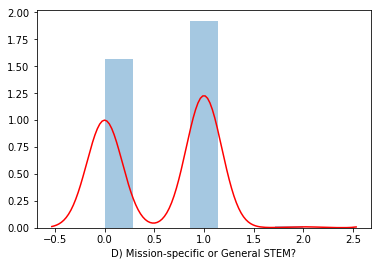

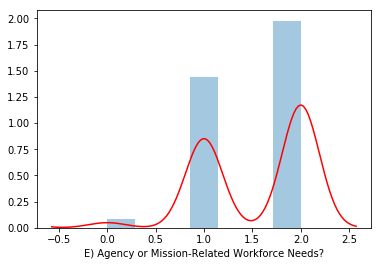

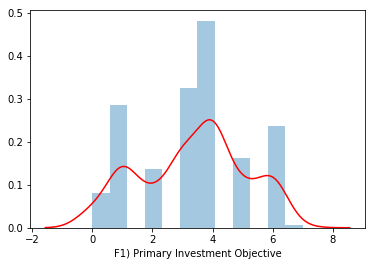

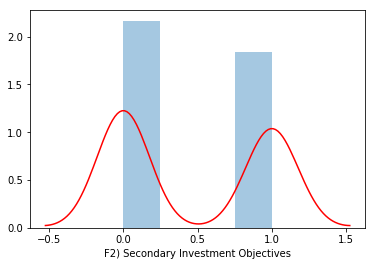

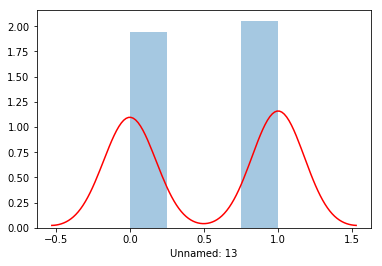

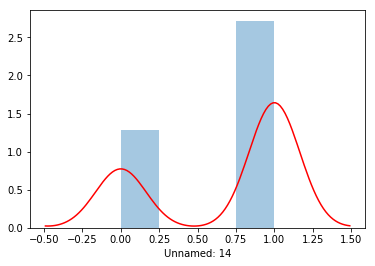

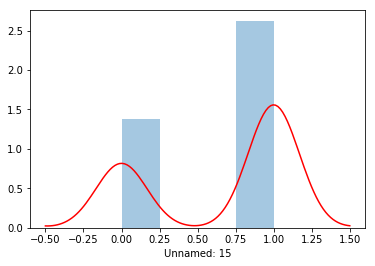

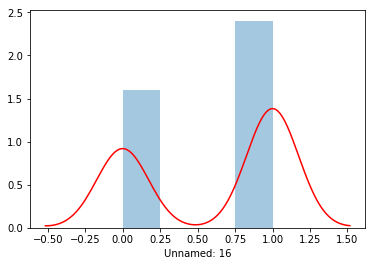

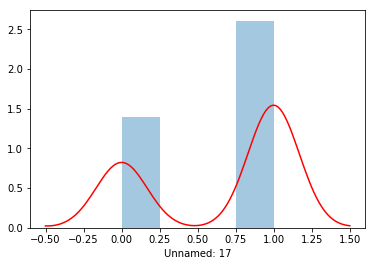

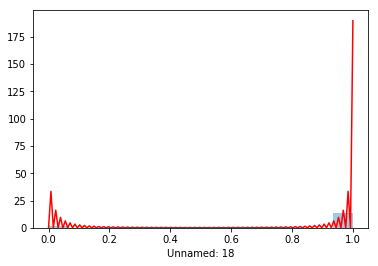

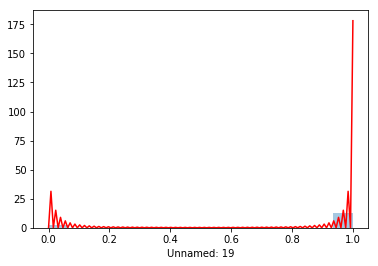

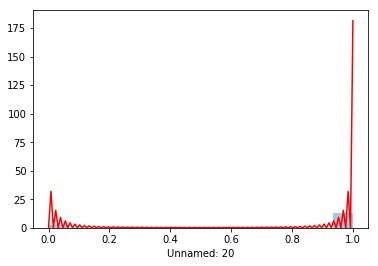

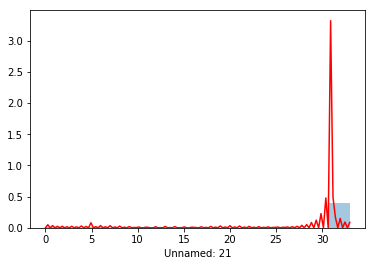

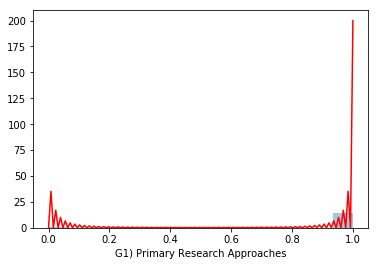

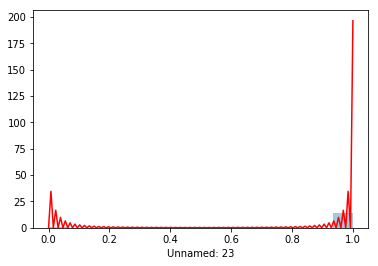

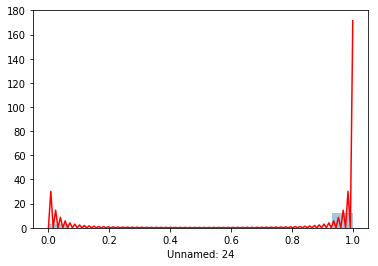

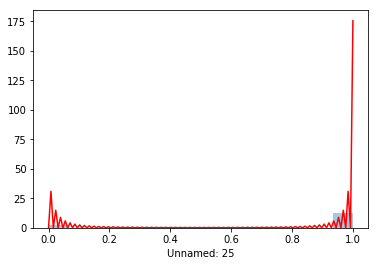

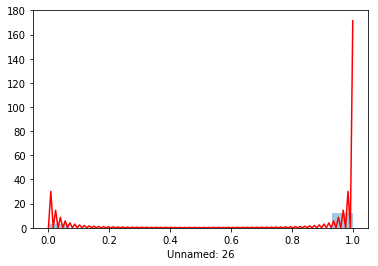

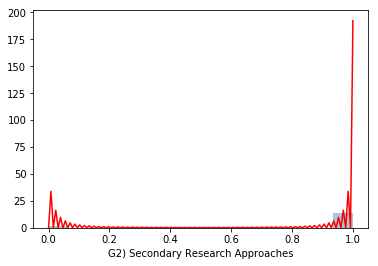

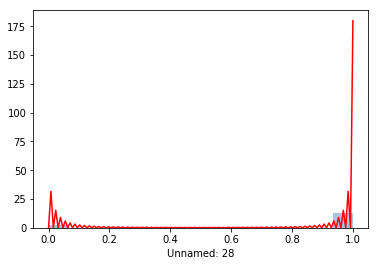

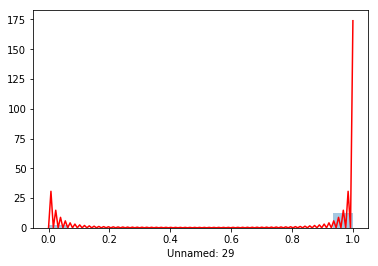

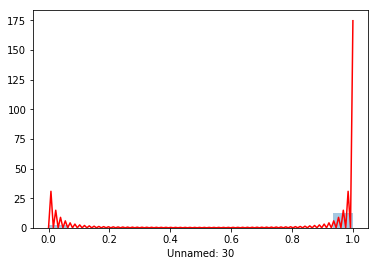

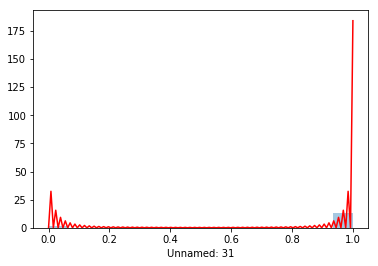

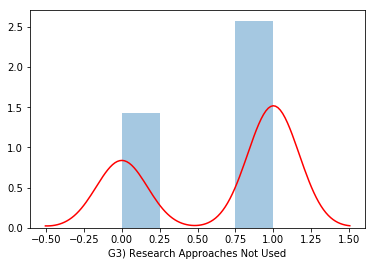

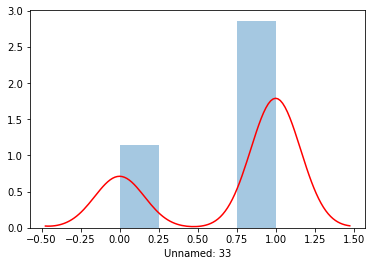

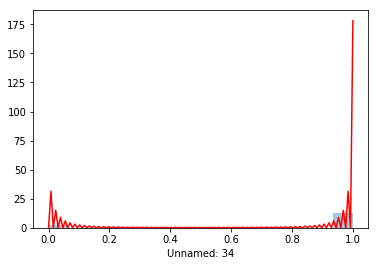

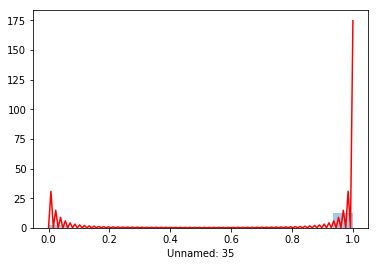

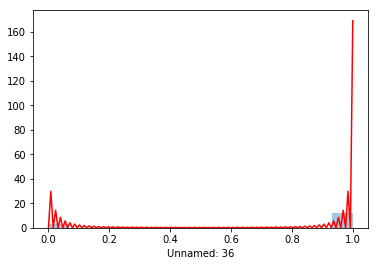

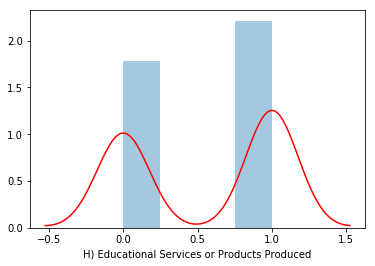

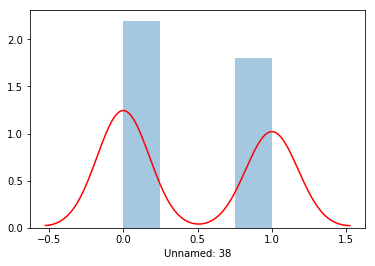

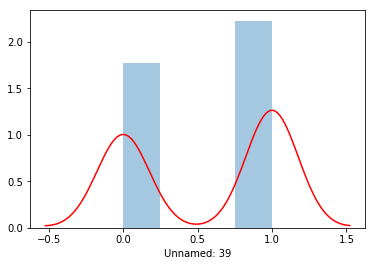

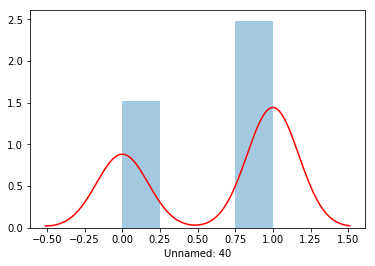

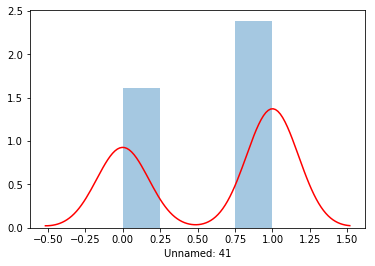

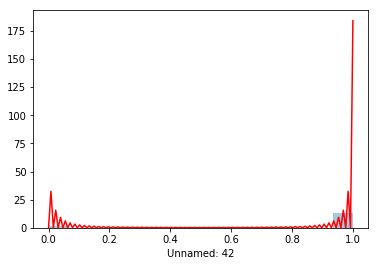

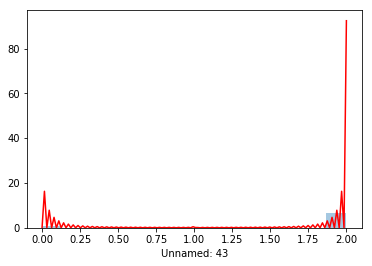

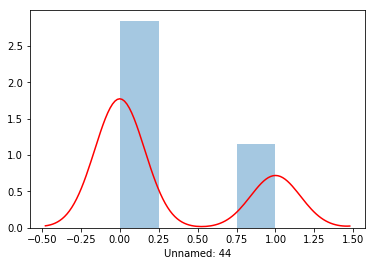

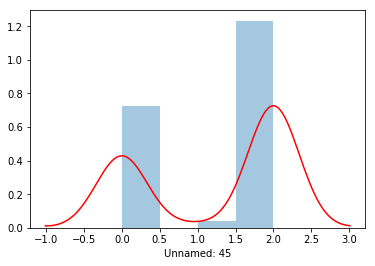

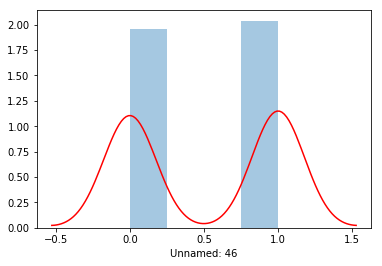

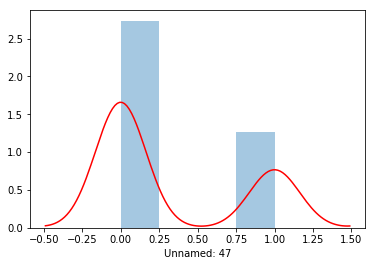

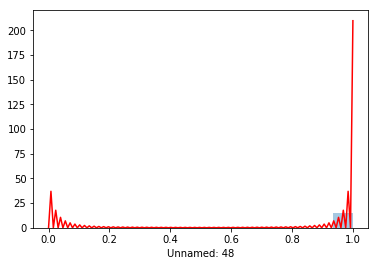

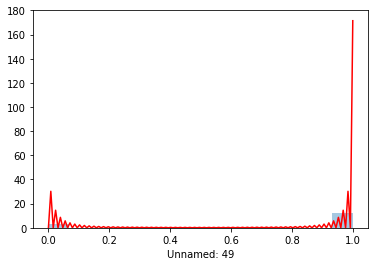

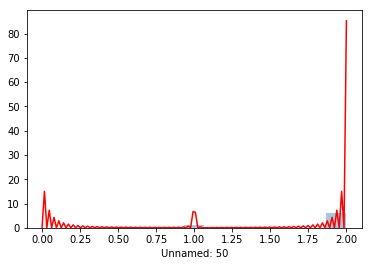

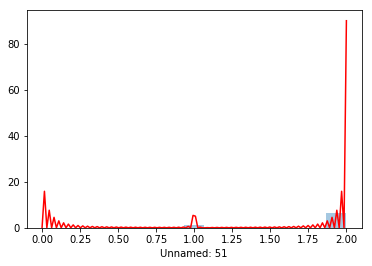

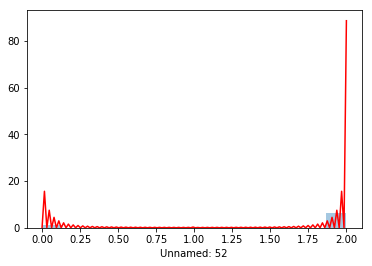

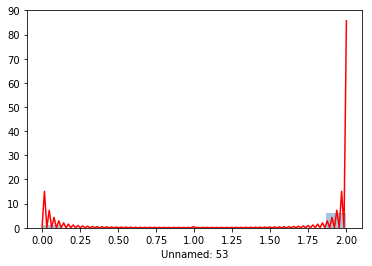

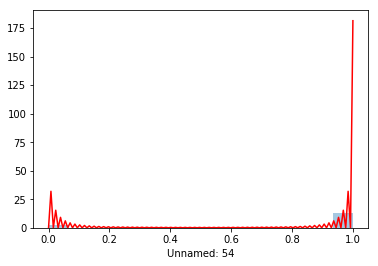

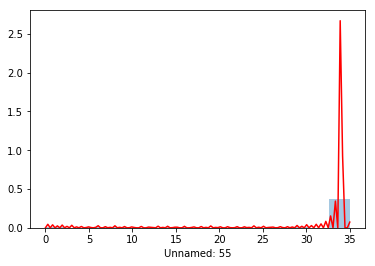

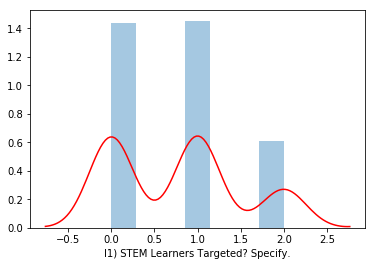

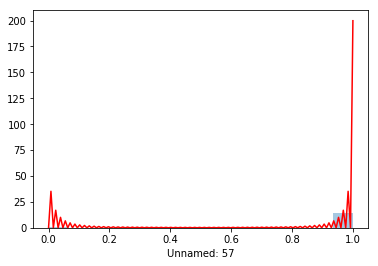

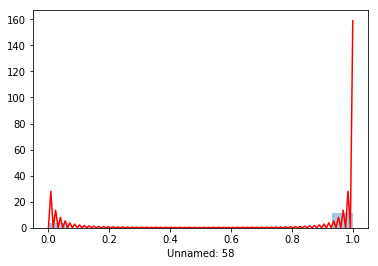

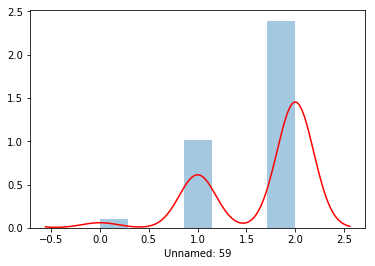

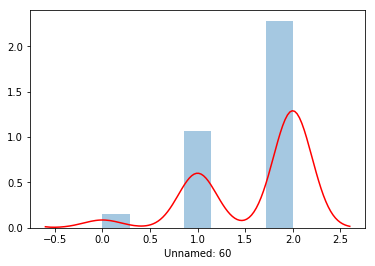

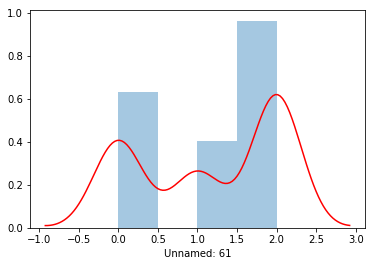

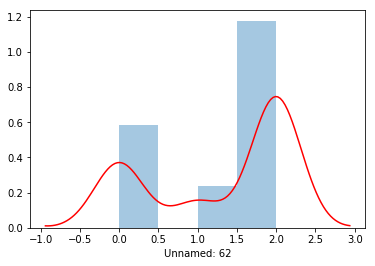

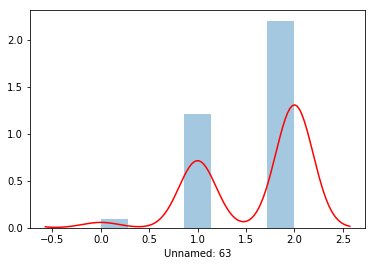

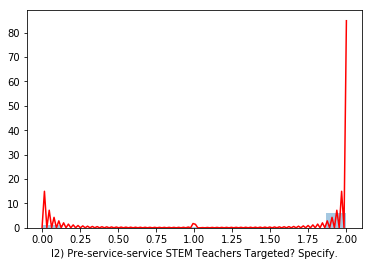

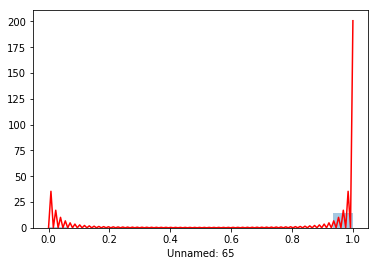

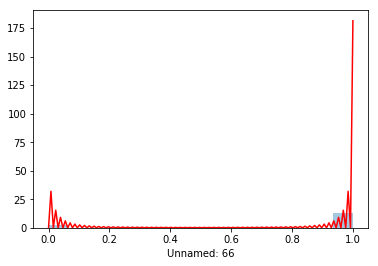

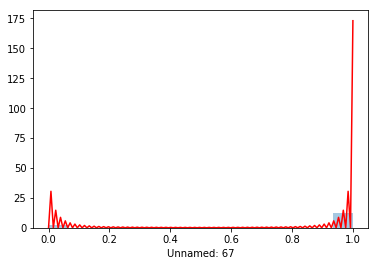

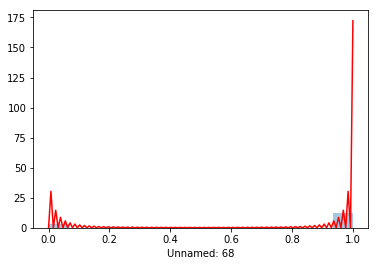

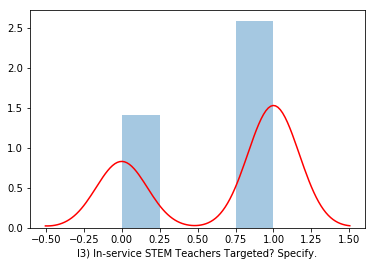

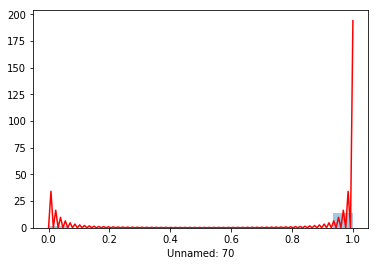

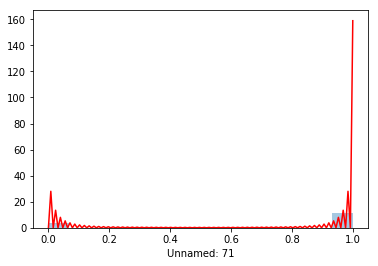

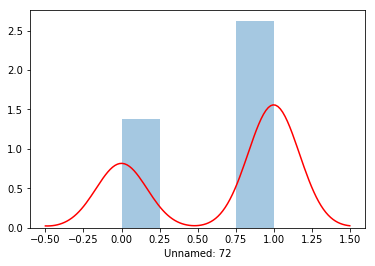

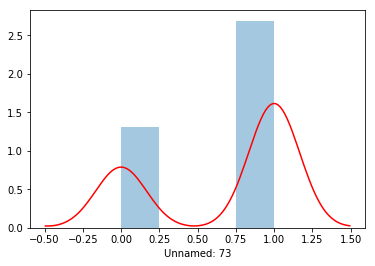

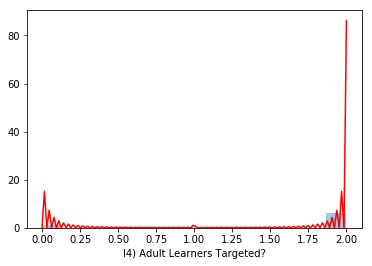

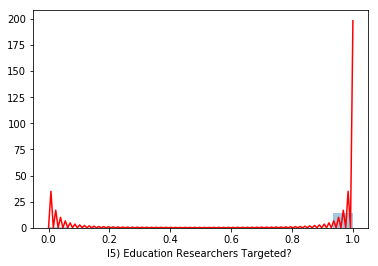

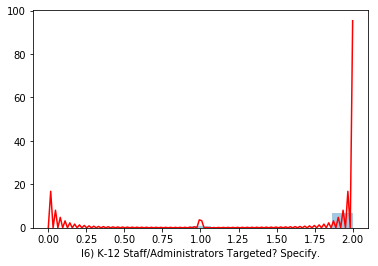

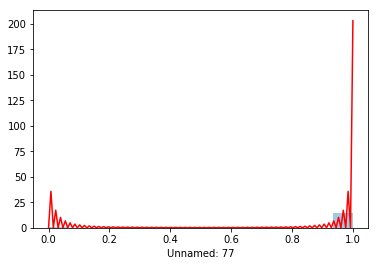

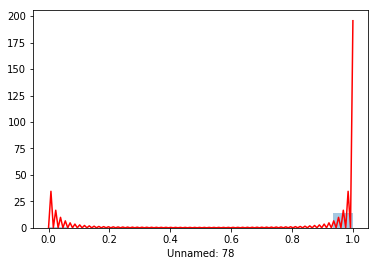

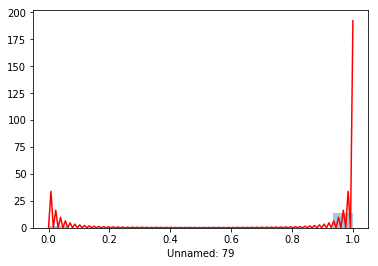

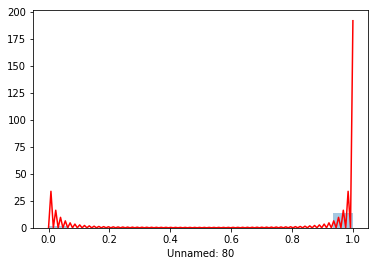

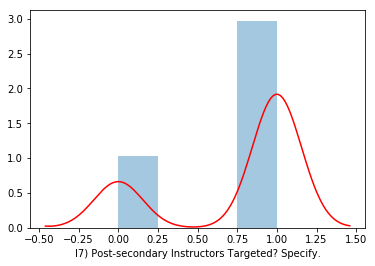

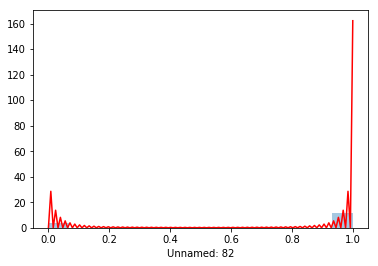

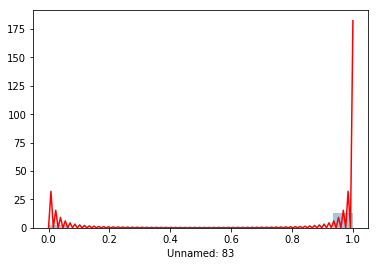

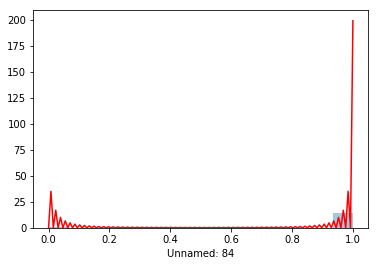

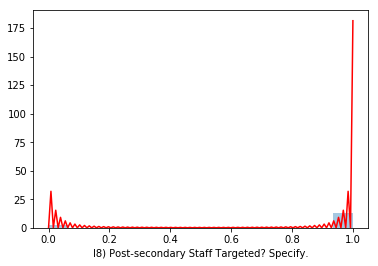

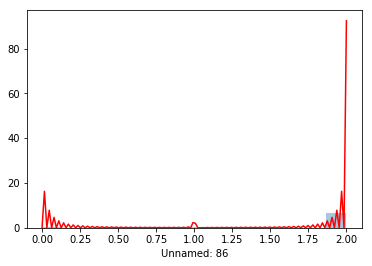

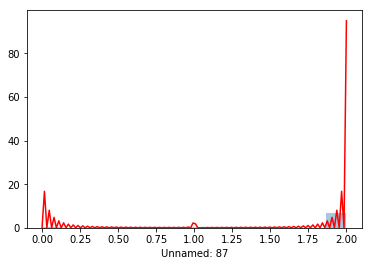

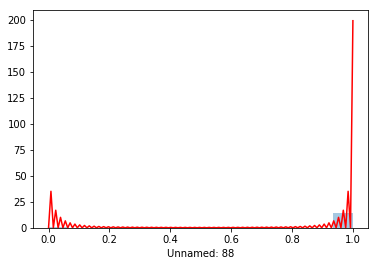

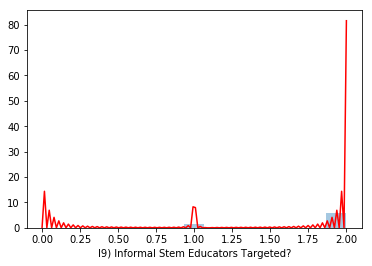

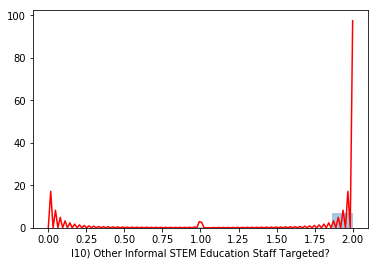

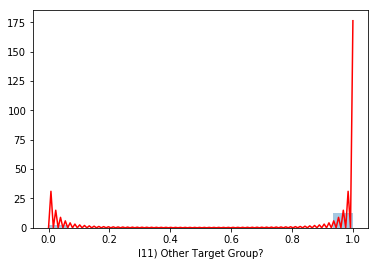

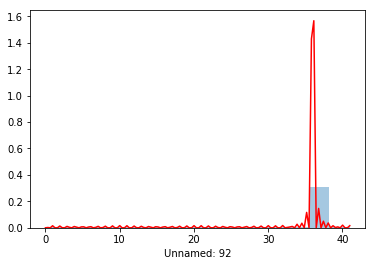

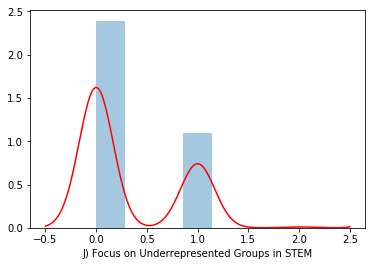

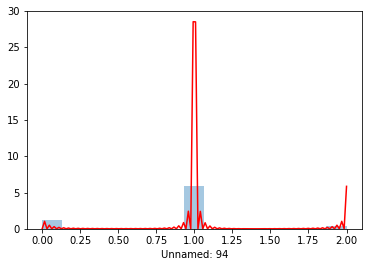

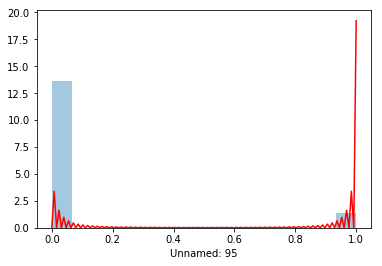

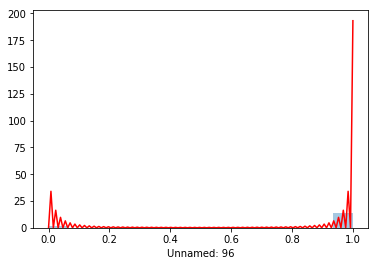

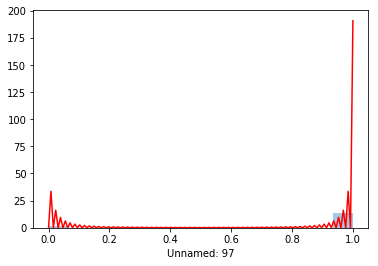

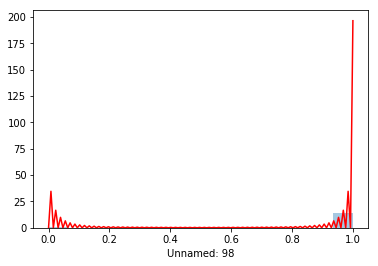

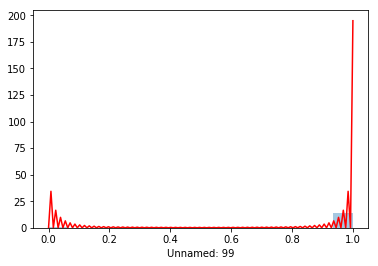

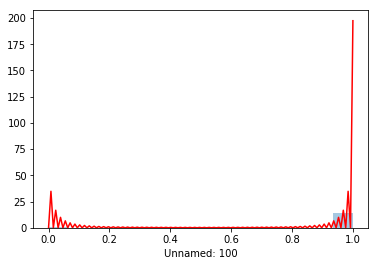

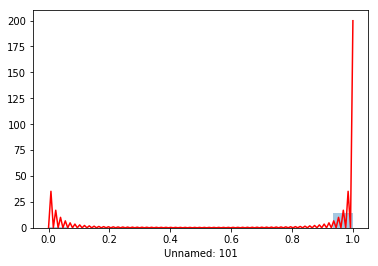

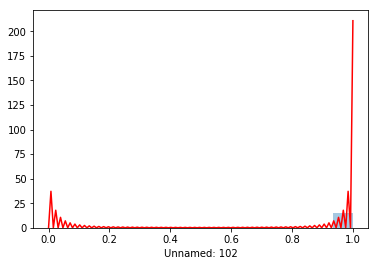

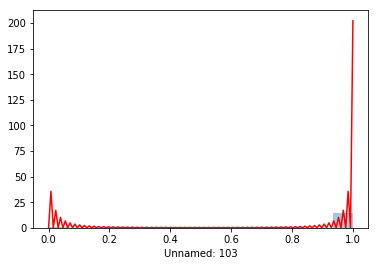

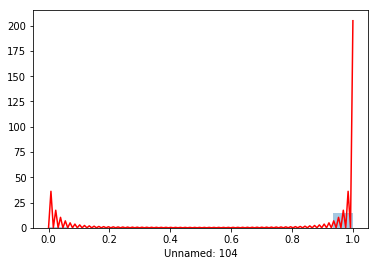

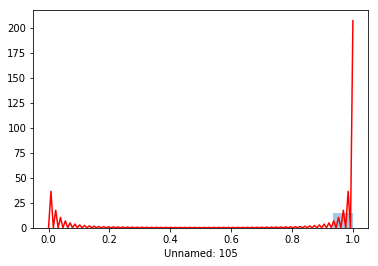

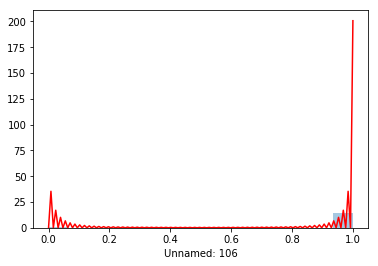

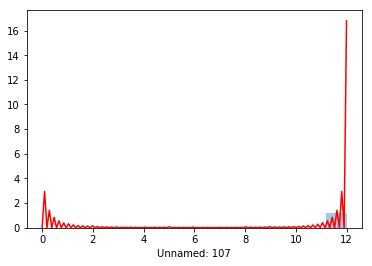

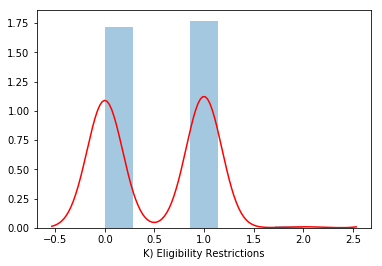

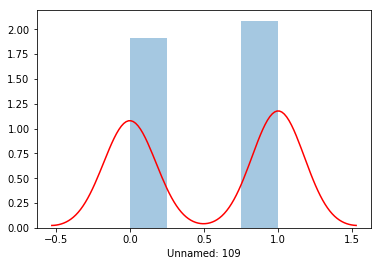

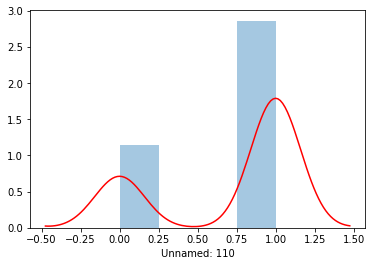

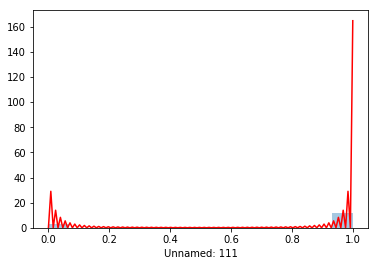

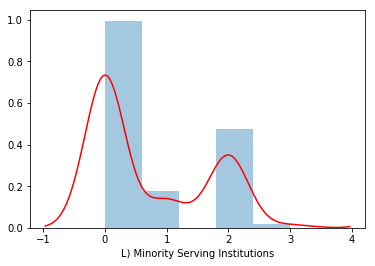

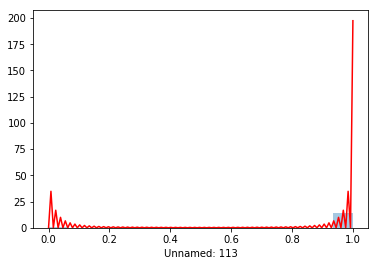

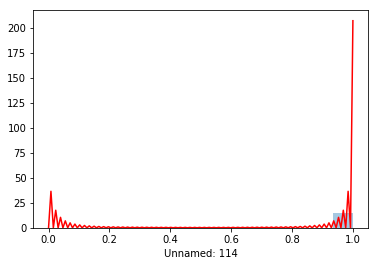

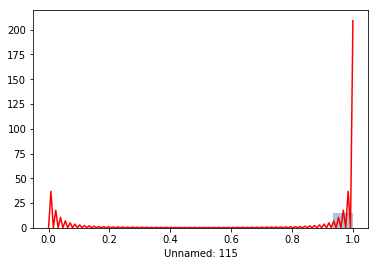

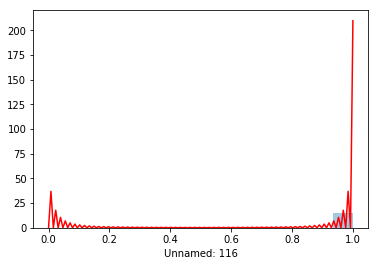

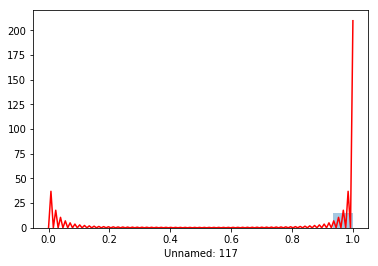

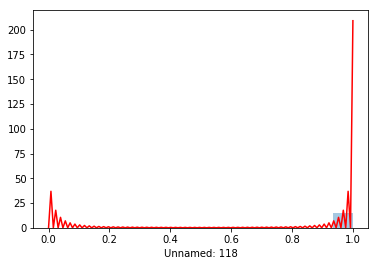

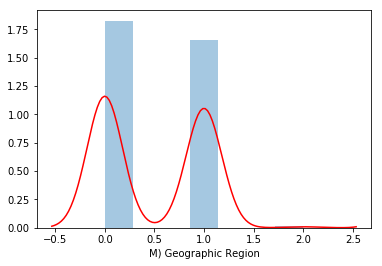

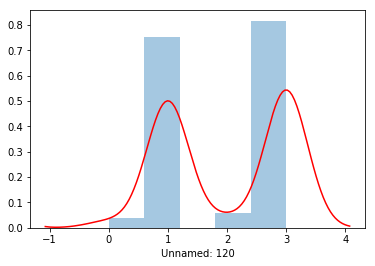

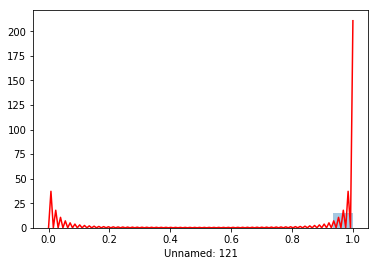

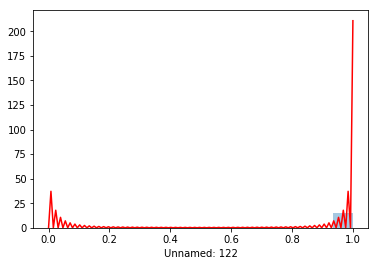

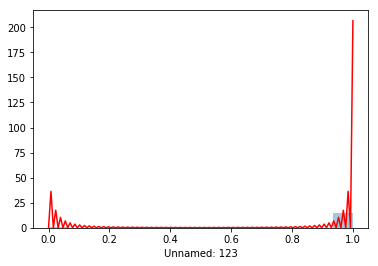

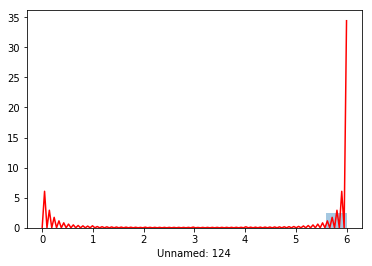

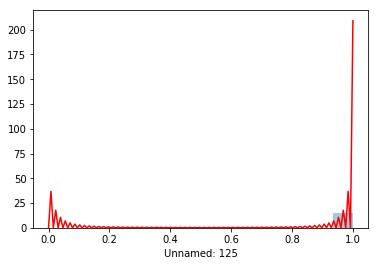

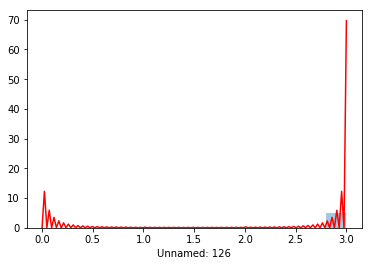

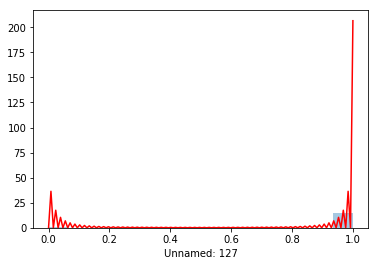

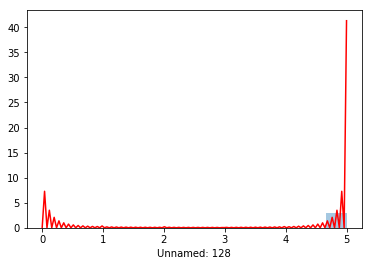

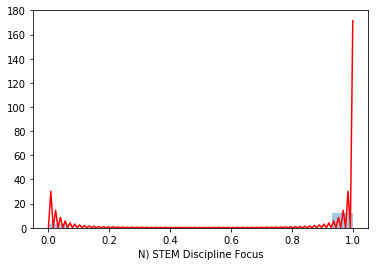

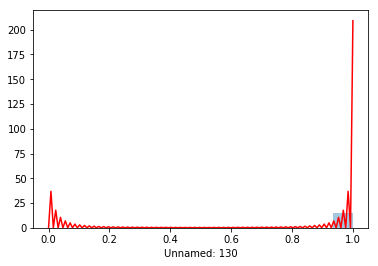

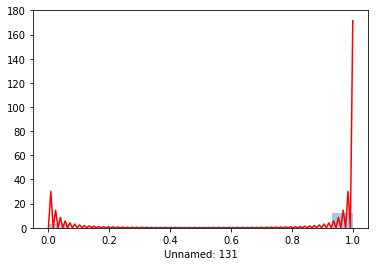

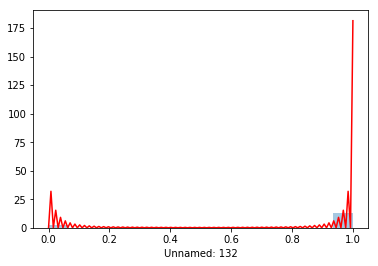

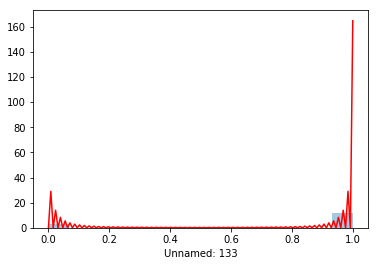

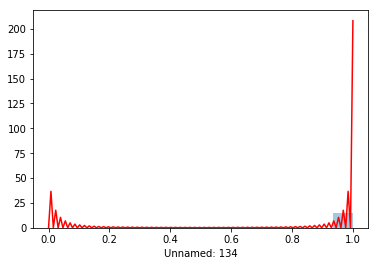

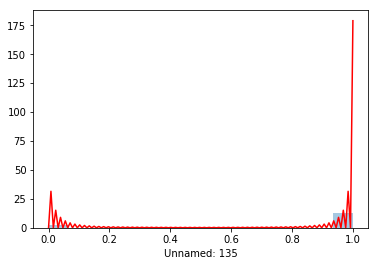

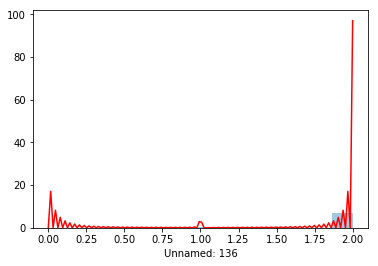

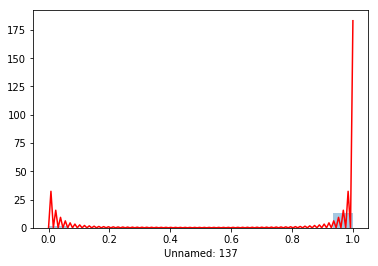

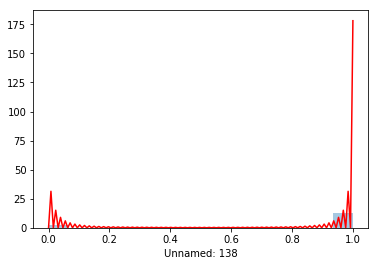

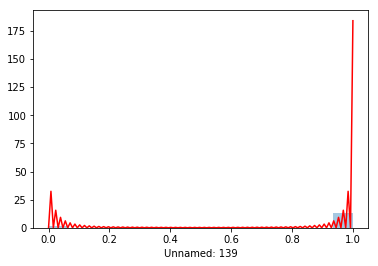

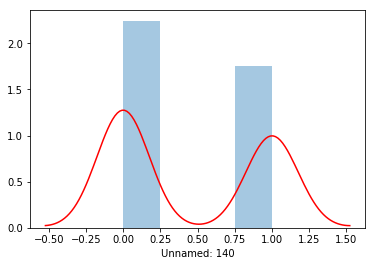

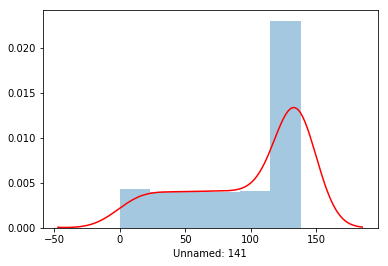

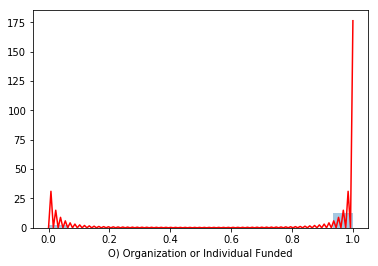

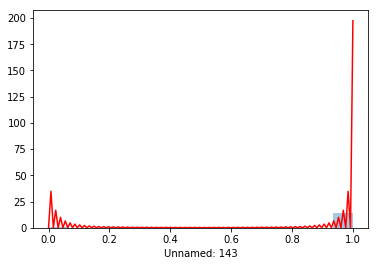

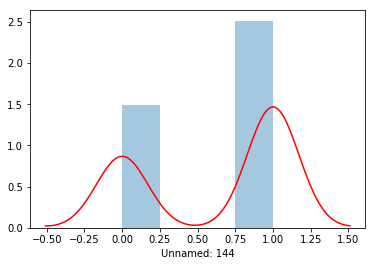

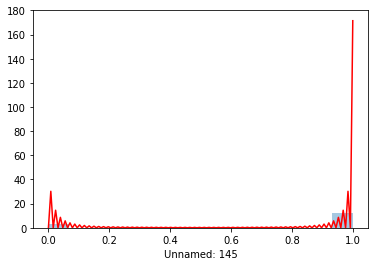

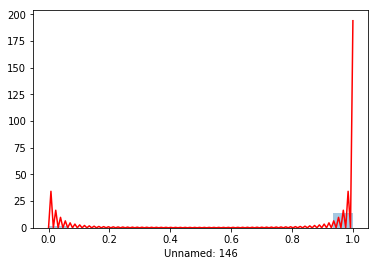

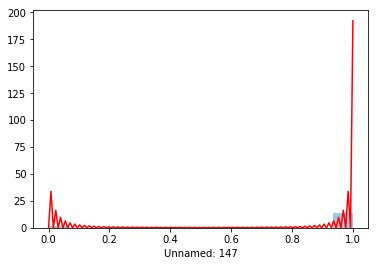

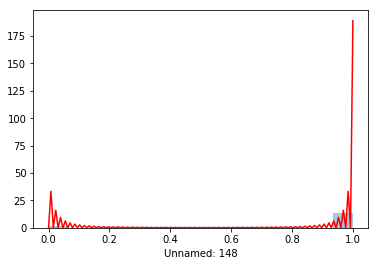

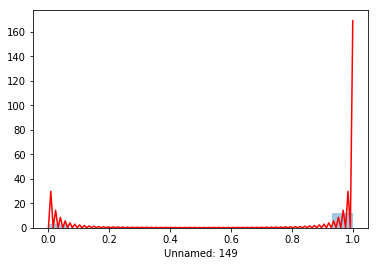

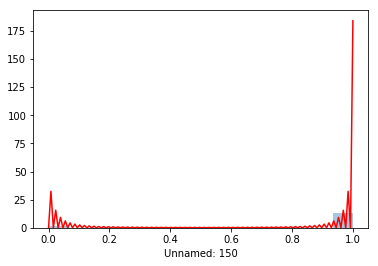

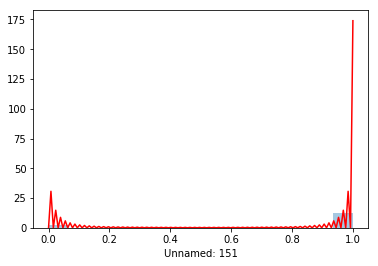

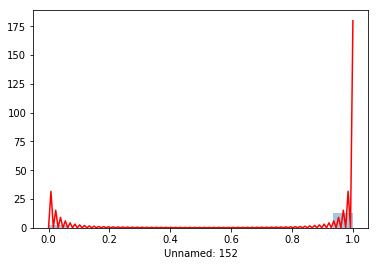

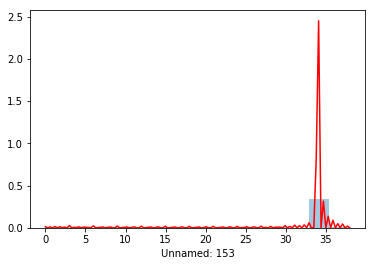

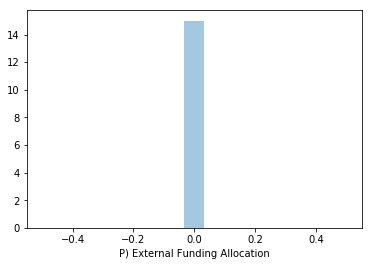

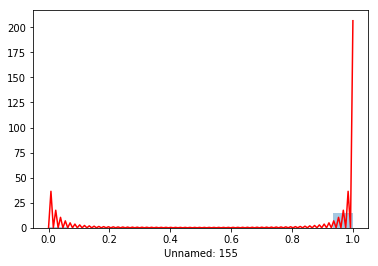

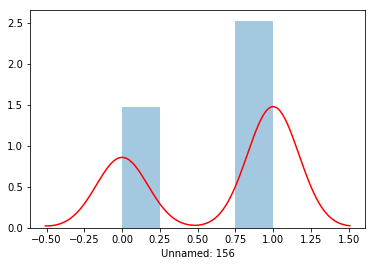

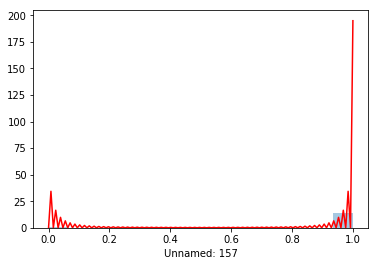

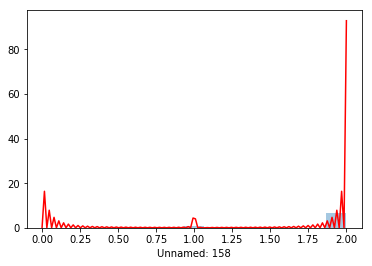

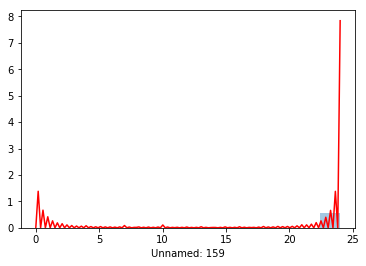

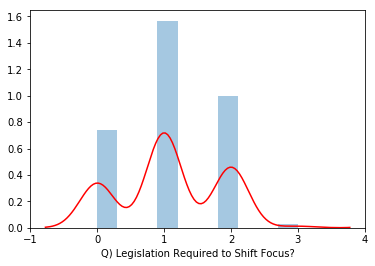

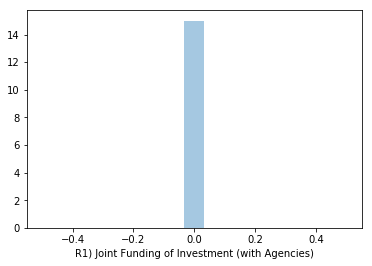

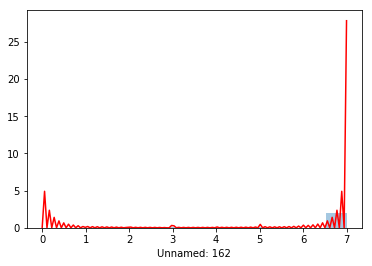

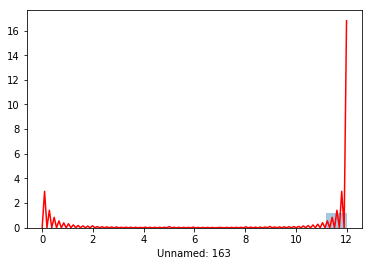

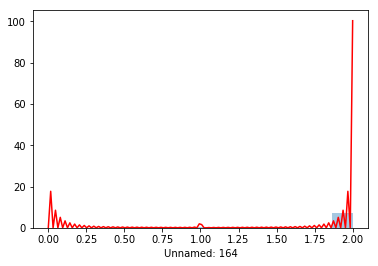

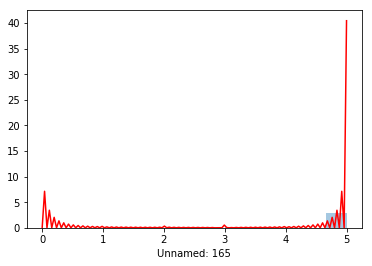

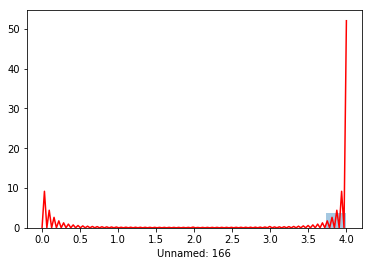

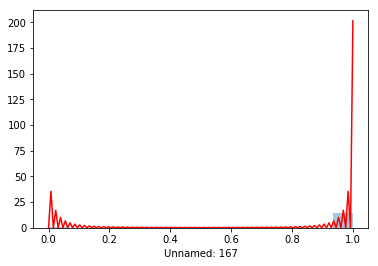

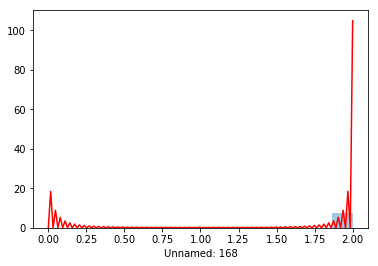

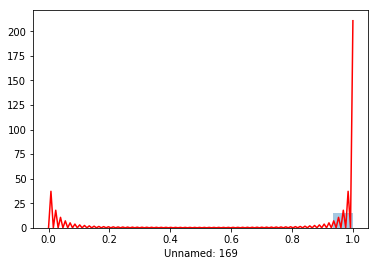

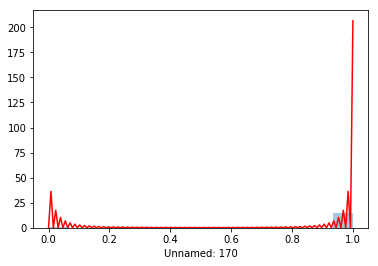

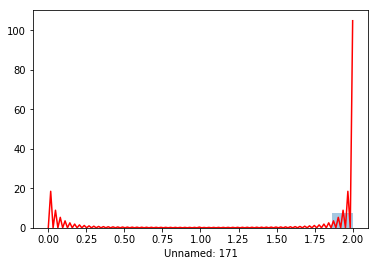

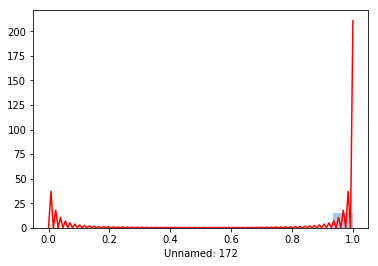

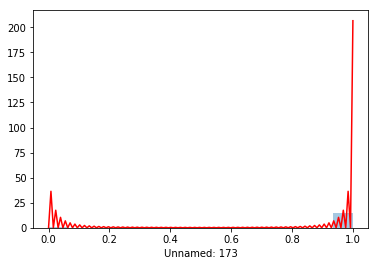

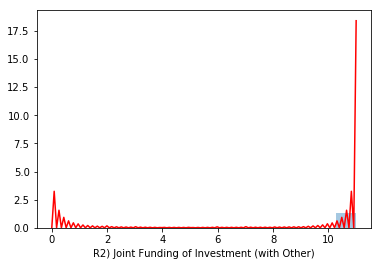

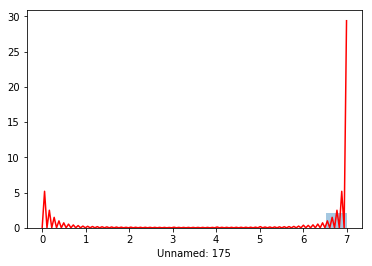

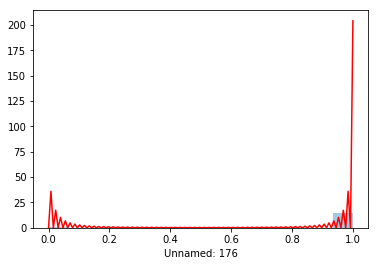

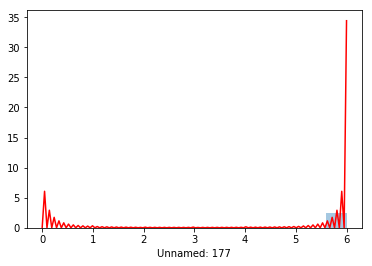

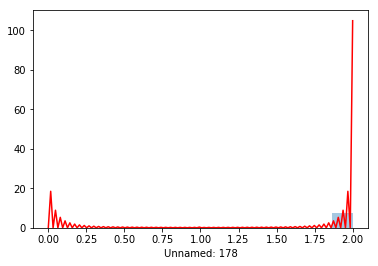

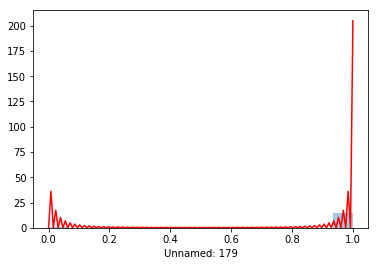

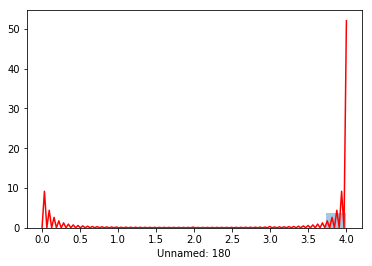

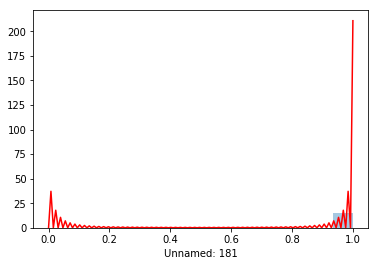

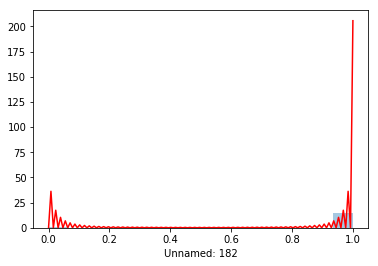

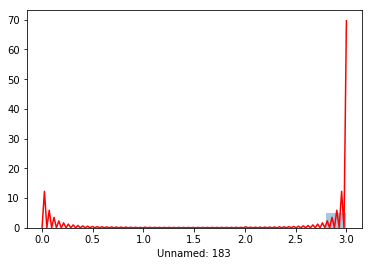

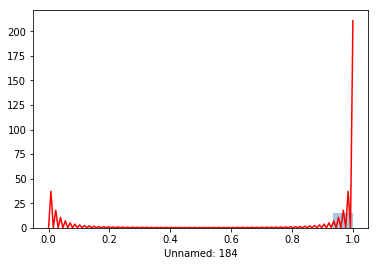

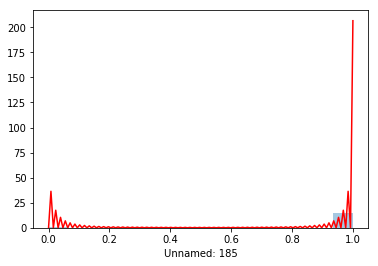

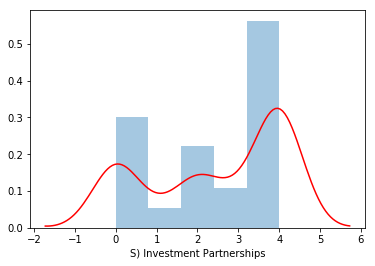

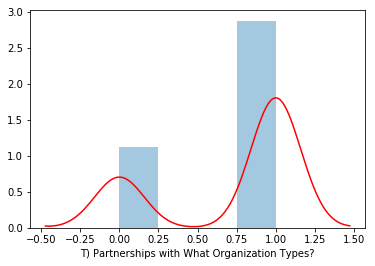

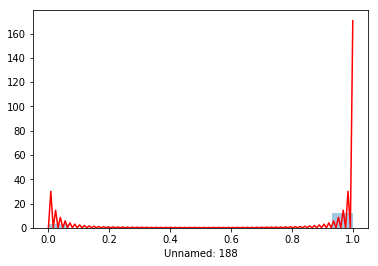

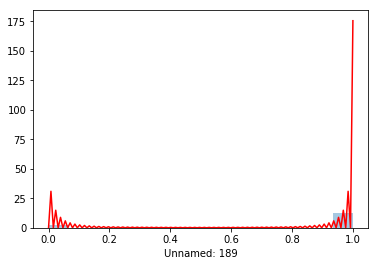

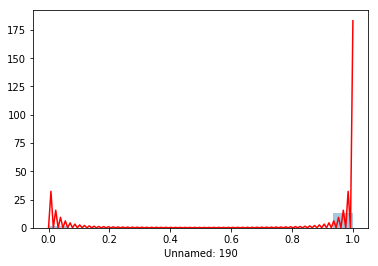

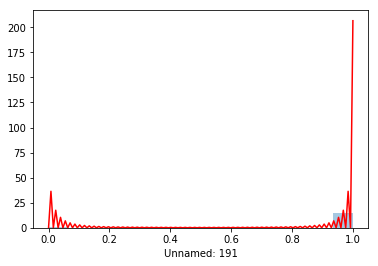

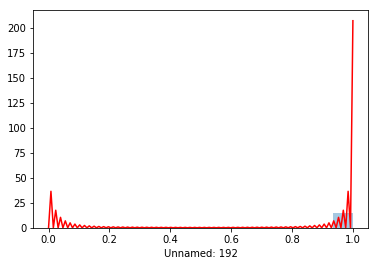

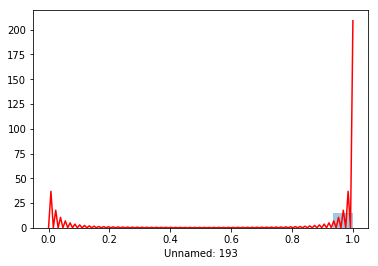

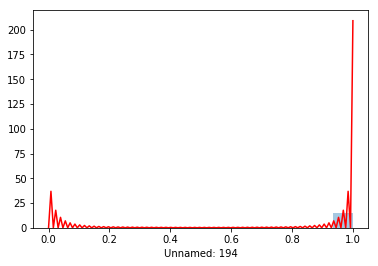

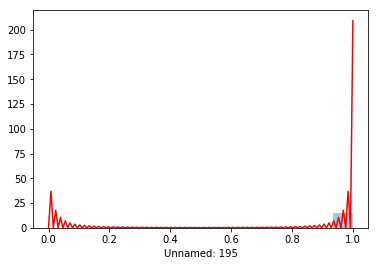

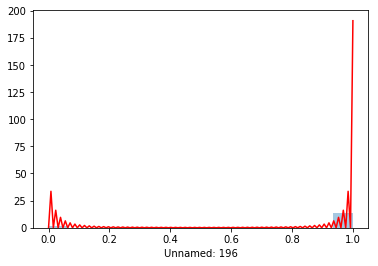

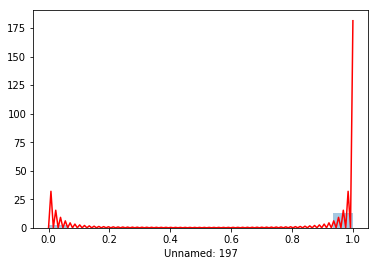

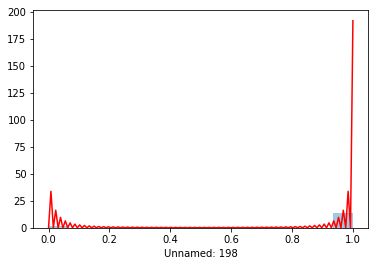

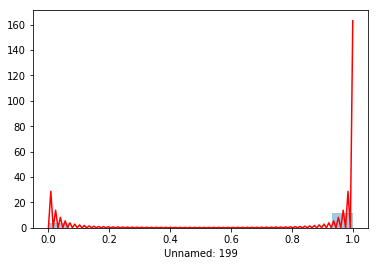

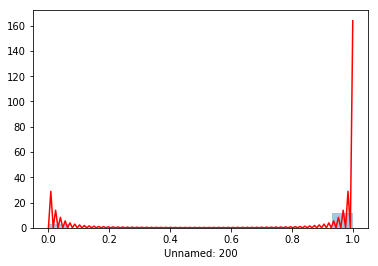

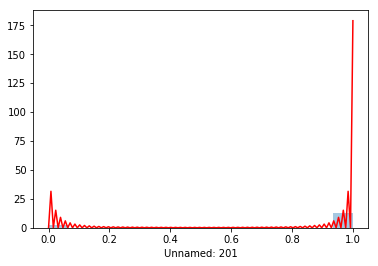

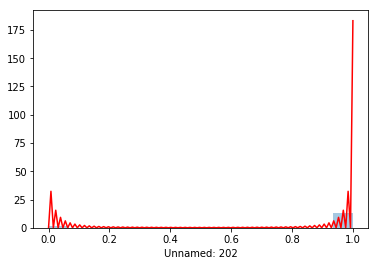

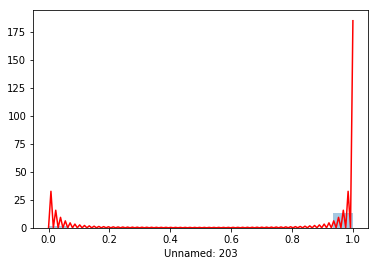

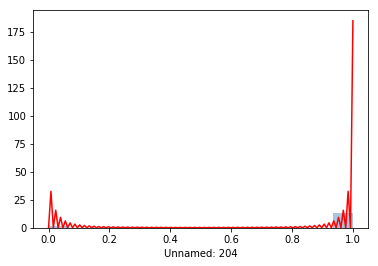

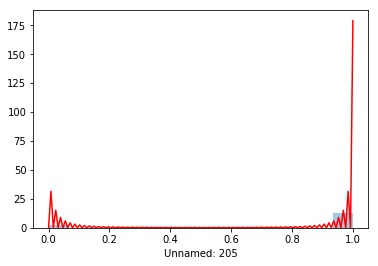

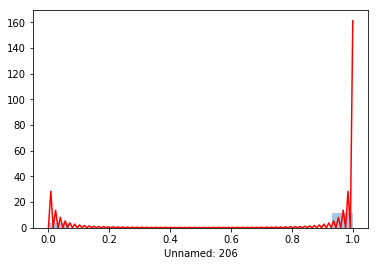

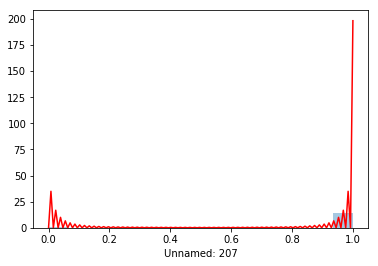

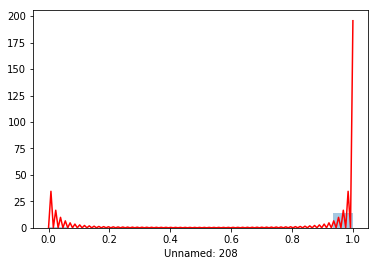

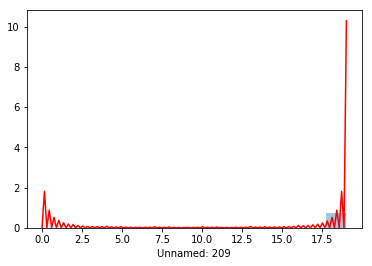

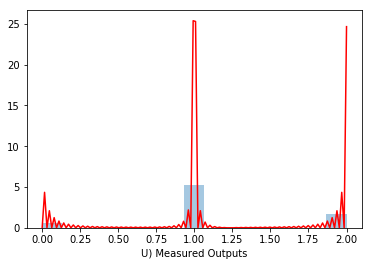

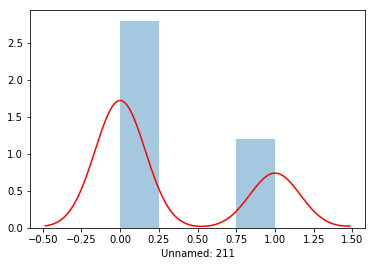

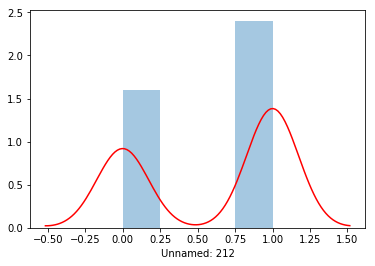

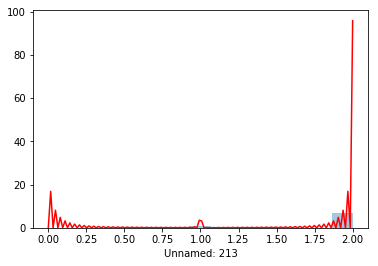

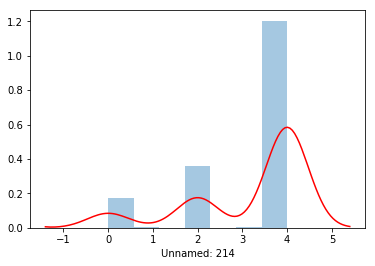

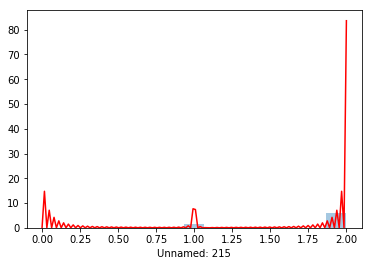

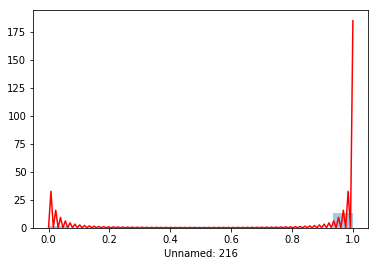

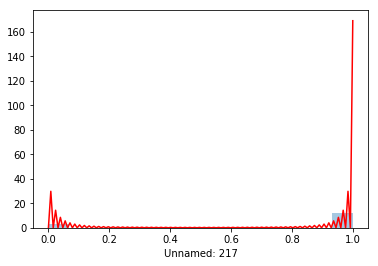

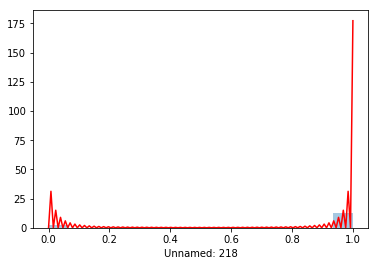

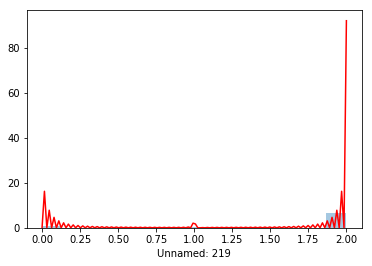

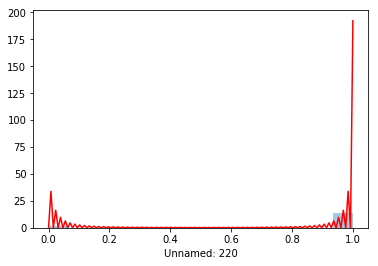

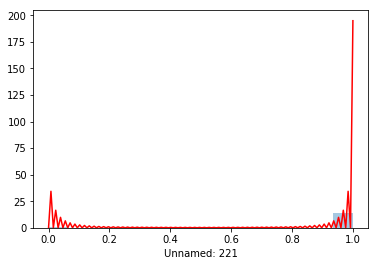

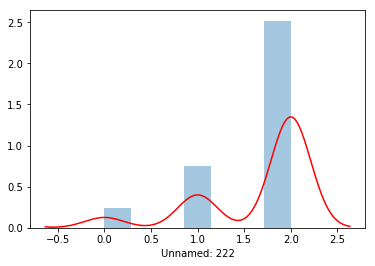

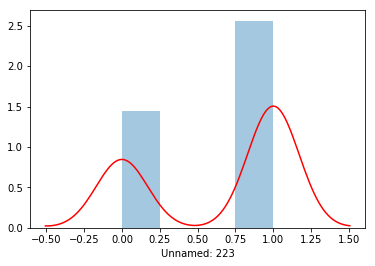

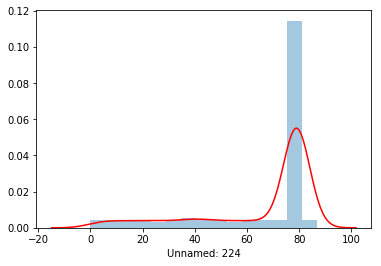

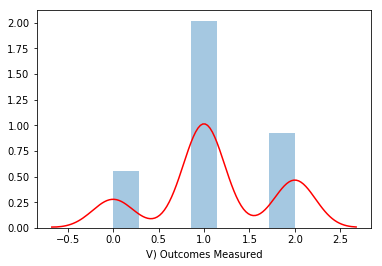

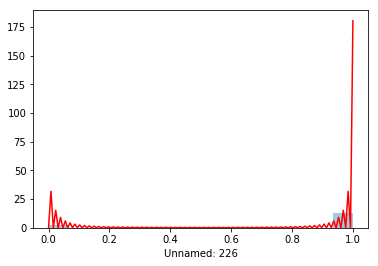

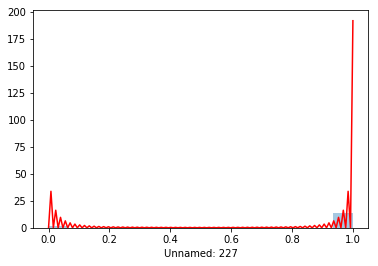

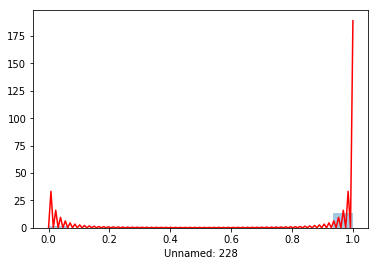

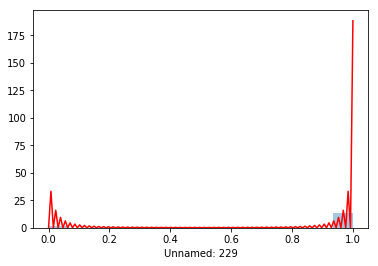

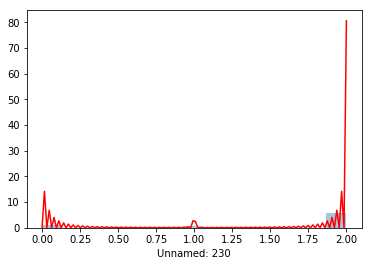

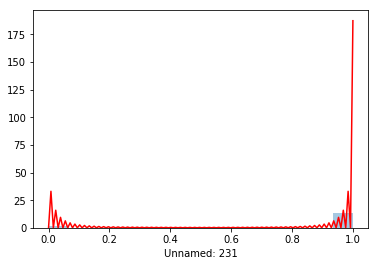

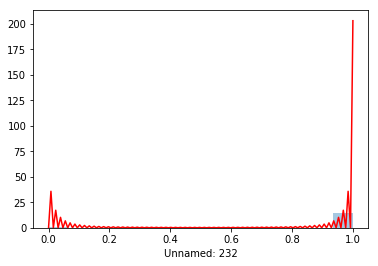

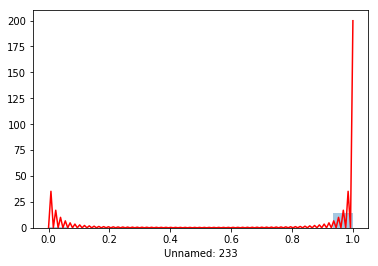

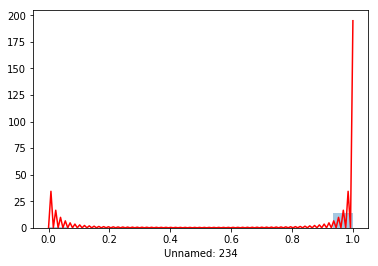

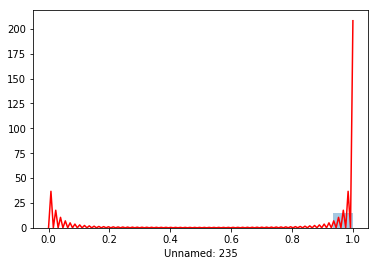

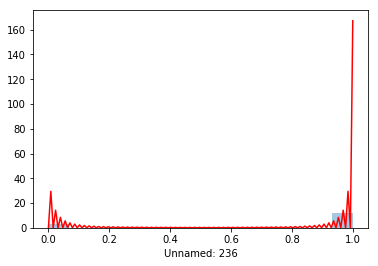

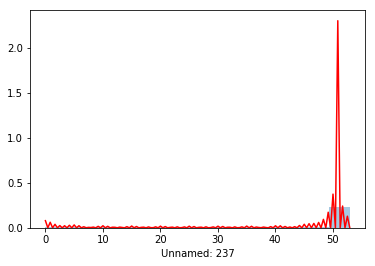

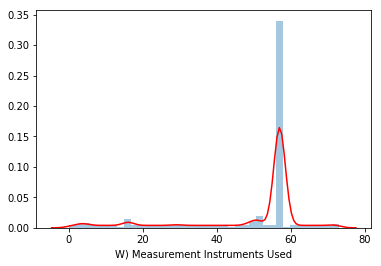

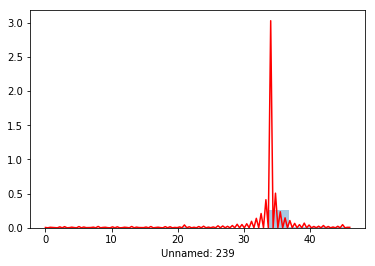

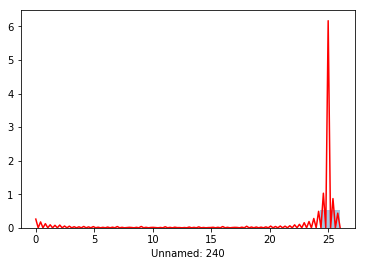

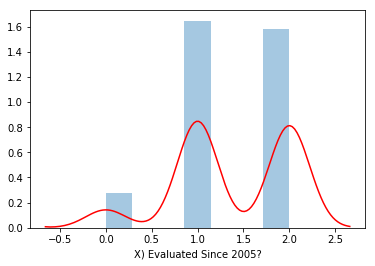

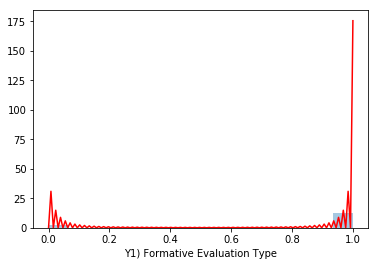

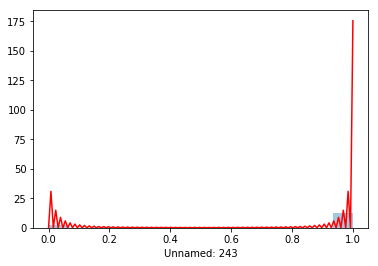

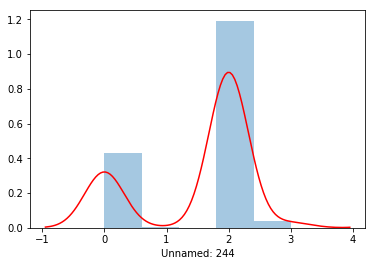

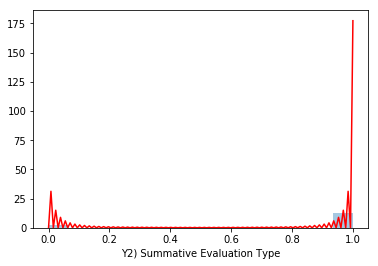

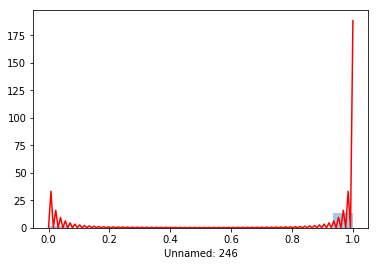

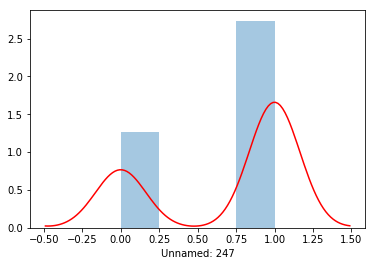

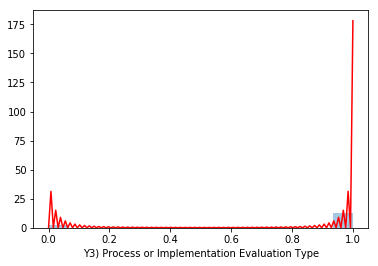

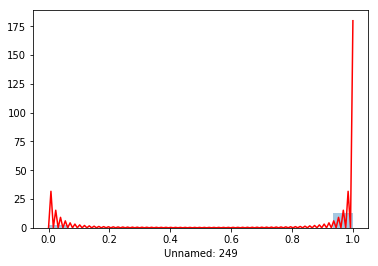

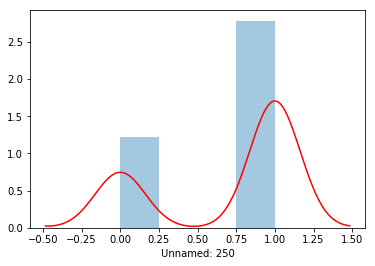

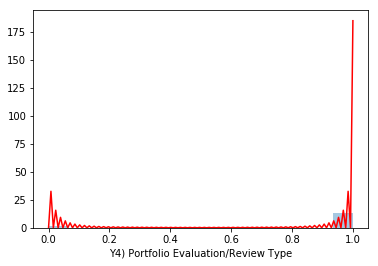

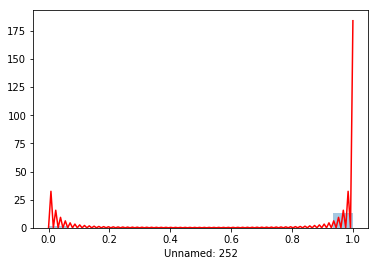

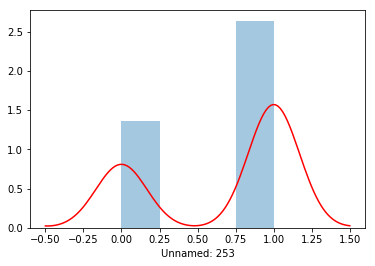

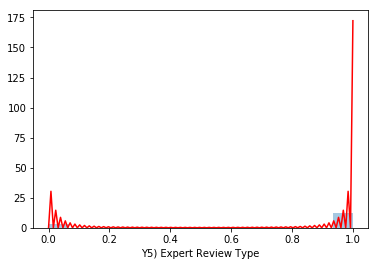

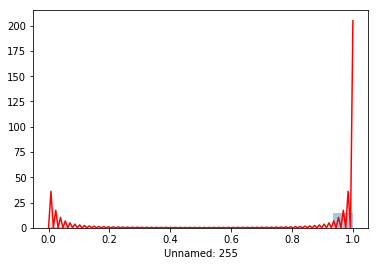

In [35]:
### warning fix coz of more than 20 plots
plt.rcParams.update({'figure.max_open_warning': 0})

### plotting data
funding_var = ['C1) Funding FY2008','C2) Funding FY2009','C3) Funding FY2010']
show_uni_plots(funding_var, df)


#### S2 TASK2

In [36]:
### 2) mutual info score
labels = dataset.target
features = dataset.drop(['target'], axis=1)
mutual_info_df = pd.DataFrame(columns=['Column', 'Mutual Info Score'])
for x in features.columns:
    if x not in funding_var:
        #print(x," \t- ", get_mutual_info_score(labels,dataset[x]))
        mutual_info_df = mutual_info_df.append({'Column':x,'Mutual Info Score':get_mutual_info_score(labels,dataset[x])},ignore_index=True)
mutual_info_df

,Column,Mutual Info Score
0,Investment Name,0.677407
1,Agency,0.087138
2,Subagency,0.237898
3,A) Brief Description,0.682908
4,B) Year Established,0.093711
5,D) Mission-specific or General STEM?,0.000265
6,E) Agency or Mission-Related Workforce Needs?,0.008824
7,F1) Primary Investment Objective,0.015278
8,F2) Secondary Investment Objectives,0.000381
9,Unnamed: 13,0.002864


In [37]:
### before going to next stage, we have split data to labels and features
labels.head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [38]:
features.shape

(252, 254)

In [39]:
##### must step need to one hot encode features
categorical_col = [x for x in features.columns if features[x].dtype=='O']
categorical_col = [x for x in categorical_col[1:] if x!='A) Brief Description']
## categorical_col
## all features except Investment Name
features = pd.get_dummies(features, columns=categorical_col, drop_first=True)
features.head(1)

,Investment Name,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,Unnamed: 163,Unnamed: 166,Unnamed: 169,Unnamed: 172,...,Unnamed: 246_NOT,Unnamed: 247_NOT,Y3) Process or Implementation Evaluation Type_NOT,Unnamed: 249_NOT,Unnamed: 250_NOT,Y4) Portfolio Evaluation/Review Type_NOT,Unnamed: 252_NOT,Unnamed: 253_NOT,Y5) Expert Review Type_NOT,Unnamed: 255_NOT
0,Centers for Ocean Sciences Education Excellence ~,The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.7,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,1,1,0,1


In [40]:
features.shape

(252, 1040)

In [41]:
### After Completion of stage 2, labels and features are separated from dataset

## STAGE 3

#### S3 TASK1

In [42]:
#### STAGE 3 TASK 1 - split by 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3,random_state=26, shuffle=True)

#### S3 TASK2

In [43]:
#### STAGE 3 TASK 2 - xgboost model
from xgboost import XGBClassifier
model = XGBClassifier(seed=26)
train_col = [x for x in features if x!='Investment Name' and x!='A) Brief Description']
model.fit(X_train[train_col].values, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=26, silent=True,
       subsample=1)

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(model.predict(X_test[train_col].values), y_test) 

1.0

#### S3 TASK3

In [45]:
#### testcases for user-defined functions
import random
import pytest

#### [TEST CASES]

#### [GOTO USER DEFINED FUNCTIONS](#User-Definded-Functions)

In [46]:
dummy_false_df, dummy_true_df = pd.DataFrame(dataset['C1) Funding FY2008']), pd.DataFrame(dataset[['C1) Funding FY2008','C2) Funding FY2009']])

######################################## PREPROCESSING TEST CASES #################################################

def test_check_missing_col():
    '''
        check_missing_col(df, obj=1 or 0)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        check_missing_col()
    assert check_missing_col(None) == None, "Failed at df is None"
    assert check_missing_col(pd.DataFrame()) == [], "Failed at empty dataframe"
    

def test_find_missing_row():
    '''
        find_missing_row(col,df,obj)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        find_missing_row()
    assert find_missing_row(None,None) == None, "Failed at either of col or df as None"
    assert find_missing_row(None,dummy_true_df) == None, "Failed at Column can't be None"
    assert find_missing_row(['some funny variable'], None) == None, "Failed at df as None"
    with pytest.raises(expected_exception=KeyError, message="Failed at no keyerror message"):
        find_missing_row('abc',df)
        
def test_common_row_missing():
    '''
        common_row_missing(col,df,obj=1 or 0)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        common_row_missing()
    assert common_row_missing(None,None) == None, "Failed at either of col or df as None"
    assert common_row_missing(None,dummy_true_df) == None, "Failed at Column can't be None"
    assert common_row_missing(['some funny variable'], None) == None, "Failed at df as None"
    with pytest.raises(expected_exception=KeyError, message="Failed at no keyerror message"):
        common_row_missing('abc',df)


def test_fill_funding():
    '''
        fill_funding(col,df)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        fill_funding()
    assert fill_funding(None,None) == None, "Failed at either of col or df as None"
    assert fill_funding(None,dummy_true_df) == None, "Failed at Column can't be None"
    assert fill_funding(['some funny variable'], None) == None, "Failed at df as None"
    with pytest.raises(expected_exception=KeyError, message="Failed at no keyerror message"):
        fill_funding('abc',df)
     
        
def test_fill_sub_agency():
    '''
        fill_sub_agency(df)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        fill_sub_agency()
    assert fill_sub_agency(pd.DataFrame()) == None, "Failed at empty dataframe"
    assert fill_sub_agency(None) == None, "Failed at None"
    
    
def test_fill_single_val_col():
    '''
        fill_single_val_col(col,df)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        fill_single_val_col()
    assert fill_single_val_col(None,None) == None, "Failed at either of col or df as None"
    assert fill_single_val_col(None,dummy_true_df) == None, "Failed at Column can't be None"
    assert fill_single_val_col([1,2,3], None) == None, "Failed at df as None"
    with pytest.raises(expected_exception=KeyError, message="Failed at no keyerror message"):
        fill_single_val_col('abc',df)
        
        
def test_fill_missing_year():
    '''
        fill_missing_year(col=,df=)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        fill_missing_year()
    assert fill_missing_year(None,None) == None, "Failed at either of col or df as None"
    assert fill_missing_year(None,dummy_true_df) == None, "Failed at Column can't be None"
    assert fill_missing_year([1,2,3], None) == None, "Failed at df as None"
    with pytest.raises(expected_exception=KeyError, message="Failed at no keyerror message"):
        fill_missing_year('abc',df)
        

############################################# STAGE 1 TESTCASES ####################################################     
        
def test_growth_rate():
    '''
        growth rate(pastValue, CurValue)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        growth_rate()
    assert growth_rate(12,0) == 0, "Failed at no funding at present"
    assert growth_rate(0,random.random()) == 1, "Failed at no funds in past"
    assert growth_rate(0,0) == 0, "Failed at no funds at anytime"
    assert growth_rate(None,None) == 0, "Failed at funds are None"
    assert growth_rate(None,0) == 0, "Failed at if past funds is None"
    assert growth_rate(0,None) == 0, "Failed at if current funds is None"
    assert growth_rate(10,None) == 0, "Failed at if current funds None and past has funds"
    
    
def test_add_growth_per():
    '''
        growth rate per(df)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        add_growth_per()
    dummy_false_df, dummy_true_df = pd.DataFrame(dataset['C1) Funding FY2008']), pd.DataFrame(dataset[['C1) Funding FY2008','C2) Funding FY2009']])
    assert add_growth_per(dummy_false_df) == None
    assert add_growth_per(dummy_true_df) is not None, "Cannot add growth percentage"
    assert add_growth_per(dummy_false_df) is None, "Dataframe has no required columns"
    

############################################## STAGE 2 TESTCASES ##################################################     

def test_just_label_encode():
    '''
        just_label_encode(col)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        just_label_encode()
    col = ['Hello','Python','World']
    assert list(just_label_encode(col)) == [0,1,2], "Encoding error"
    assert len(list(just_label_encode(col))) == len(col), "Different in length output"
    assert just_label_encode([]) == None
    
    
def test_show_uni_plots():
    '''
        show_uni_plots(funding_var, df)
        In this context we always provide funding_var as a list not as NoneType
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        show_uni_plots()
    
    false_var, true_var = [], [1,2,3]
    assert show_uni_plots(true_var,pd.DataFrame()) == None, "Failed at empty dataframe"
    assert show_uni_plots(true_var, None) == None, "Failed at dataframe as None"
    assert show_uni_plots(None,None) == None, "Failed at either funding_var or dataframe as None"
    assert show_uni_plots(None,dummy_false_df) == None, "Failed at funding_var as none"
    assert show_uni_plots(false_var, dummy_false_df) == None, "Failed at funding_var as empty list"
    
    
def test_get_mutual_info_score():
    '''
        get_mutual_info_score(target,col)
    '''
    with pytest.raises(expected_exception=TypeError,  message="Expecting TypeError with no required args passed"):
        get_mutual_info_score()
    col = ['Hello','Python','World']
    assert get_mutual_info_score([1,2],['my-dummy-col']) == None, "Failed at different length case"
    assert get_mutual_info_score([1,2],['hel','wor']) is not None, "Failed at getting mutual info score"
    assert get_mutual_info_score(['1',2],None) == None, "Failed at col is None"
    assert get_mutual_info_score(None,['1',2]) == None, "Failed at target as None"
    

In [54]:
preprocess_func = ['check_missing_col','find_missing_row','common_row_missing','fill_funding', 'fill_sub_agency', 'fill_single_val_col', 'fill_missing_year']
stage1_func = ['growth_rate', 'add_growth_per']
stage2_func =['just_label_encode','show_uni_plots','get_mutual_info_score']
for x in preprocess_func+stage1_func+stage2_func:
    eval(str('test_')+x+'()')
    print("TEST CASES PASSED for function",x+str('()'),'✔️')

TEST CASES PASSED for function check_missing_col() ✔️
TEST CASES PASSED for function find_missing_row() ✔️
TEST CASES PASSED for function common_row_missing() ✔️
TEST CASES PASSED for function fill_funding() ✔️
TEST CASES PASSED for function fill_sub_agency() ✔️
TEST CASES PASSED for function fill_single_val_col() ✔️
TEST CASES PASSED for function fill_missing_year() ✔️
TEST CASES PASSED for function growth_rate() ✔️
TEST CASES PASSED for function add_growth_per() ✔️
TEST CASES PASSED for function just_label_encode() ✔️
TEST CASES PASSED for function show_uni_plots() ✔️
TEST CASES PASSED for function get_mutual_info_score() ✔️


In [59]:
!pytest testfunctions.py

============================= test session starts ==============================
platform linux -- Python 3.6.5, pytest-3.6.3, py-1.5.4, pluggy-0.6.0
rootdir: /home/vinay/projects/hackathons/redcarpet, inifile:
collected 12 items                                                             

testfunctions.py ............                                            [100%]

========================== 12 passed in 0.88 seconds ===========================


In [56]:
##########################  RESOURCES and TOOLS #############################
###        GOOGLE SHEETS for DATA reading and understanding               ###
###                       Jupyter Notebook                                ###
###                  scikit-learn for LabelEncoder                        ###
###              stackoverflow for pandas, roc_acu_score etc              ###
###                  pytest Tutorialspoint first chapter                  ###
#############################################################################

In [58]:
########################################## END OF THE NOTEBOOK ####################################################